# Final Report - Data Science
## Bachelor's Degree in Computer Science / PUCPR

**Prof. Jean Paul Barddal**

Lucas Gabriel Nunes Geremias - S.gabriel9@pucpr.edu.br

João Vitor Zambão - joao.zambao@pucpr.edu.br

Lucca Lucchin de Campos Costa - lucca.costa@pucpr.edu.br

Drayan Silva Magalhães - drayan.silva@pucpr.edu.br

Joel Sepulveda Martins - martins.joel@pucpr.edu.br


2025

# Import the libs you need

In [1]:
# Import all packages you need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
# etc.

C:\Users\lgng\AppData\Local\Temp\ipykernel_10320\2141568457.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load your data

Below, load the data using pandas and perform all necessary data cleansing to ensure that the data types are correct for further analysis.

Link da base https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [2]:
# load your data here
df = pd.read_csv("creditcard.csv")

In [3]:
# Criando intervalos para analisar os valores das transações

df["Amount_Interval"] = pd.cut(
    df["Amount"], 
    bins=[-np.inf, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, np.inf], 
    labels=[
        "até 5", 
        "5 a 10", 
        "10 a 15",
        "15 a 20", 
        "20 a 25",
        "25 a 30",
        "30 a 35",
        "35 a 40",
        "40 a 45",
        "45 a 50", 
        "50 a 60",
        "60 a 70",
        "70 a 80",
        "80 a 90",
        "90 a 100",
        "Maior que 100"
    ]
)

# Criando intervalos para analisar o intervalo de tempo desde a primeira transação da base

df["Time_Interval"] = pd.cut(
    df["Time"], 
    bins=[-np.inf, 3600,  18000, 36000, 54000, 72000, 86400, 108000, 129600, 151200, 172800, np.inf], 
    labels=[
        "até 1h", 
        "1h a 5h", 
        "5h a 10h", 
        "10h a 15h",
        "15h a 20h",
        "20h a 24h", 
        "24h a 30h",
        "30h a 36h",
        "36h a 42h",
        "42h a 48h",
        "Maior que 48 h"
    ]
)

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Interval,Time_Interval
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Maior que 100,até 1h
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,até 5,até 1h
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Maior que 100,até 1h
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Maior que 100,até 1h
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,60 a 70,até 1h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,até 5,42h a 48h
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,20 a 25,42h a 48h
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,60 a 70,42h a 48h
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,5 a 10,42h a 48h


### Descrição da base:

O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por portadores de cartões europeus.

Esse conjunto de dados apresenta transações que ocorreram em dois dias, nas quais temos 492 fraudes entre 284.807 transações. O conjunto de dados é altamente desbalanceado — a classe positiva (fraudes) representa apenas 0,172% de todas as transações.

Ele contém apenas variáveis de entrada numéricas, que são o resultado de uma transformação PCA (Análise de Componentes Principais). Infelizmente, por questões de confidencialidade, não podemos fornecer as características originais e mais informações sobre o contexto dos dados. As variáveis V1, V2, ..., V28 são os componentes principais obtidos com o PCA. As únicas variáveis que não foram transformadas com PCA são 'Time' e 'Amount'. A variável 'Time' contém o número de segundos decorridos entre cada transação e a primeira transação do conjunto de dados. A variável 'Amount' representa o valor da transação e pode ser usada, por exemplo, para aprendizado sensível ao custo dependente do exemplo. A variável 'Class' é a variável de resposta e assume o valor 1 em caso de fraude e 0 caso contrário.

Dada a razão de desbalanceamento entre as classes, recomendamos medir a acurácia utilizando a Área sob a Curva de Precisão-Revocação (AUPRC). A acurácia baseada na matriz de confusão não é significativa para classificações desbalanceadas.

# Statistical Description

In this section, you should report the key characteristics of the dataset, including but not limited to:
* Number of instances;
* Number of features;
* Number of classes;
* Class distribution.

In [5]:
# use as many code and text cells as needed
print("Number of instances: ", df.shape[0])

print("Number of features: ", df.shape[1])

Number of instances:  284807
Number of features:  33


### Variaveis Explicativas

- Amount (Valor): Valor das transações [Quantitativa Continua]

- Time (Tempo): Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados [Quantitativa Continua]

- [V1, V2... V28]: Colunas resultantes de uma redução de dimensionalidade do PCA para proteger identidades de usuários e recursos confidenciais (v1-v28) [Quantitativa Continua]

#### _Variaveis Catégoricas Explicativas Criadas_

- _Amount_Interval_ : Intervalo do valor das transações [Catégorica Ordinal] 

- _Time_Interval_ : Intervalo de tempo das transações desde a primeira Transação da base [Catégorica Ordinal] 

In [6]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
df["Time"].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [8]:
for i in range(1, 29):
    col = f"V{i}"
    print(col)
    print(df[col].describe())
    print("-" * 20)

V1
count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64
--------------------
V2
count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64
--------------------
V3
count    2.848070e+05
mean    -1.379537e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64
--------------------
V4
count    2.848070e+05
mean     2.074095e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
max      1.687534e+01
Name: V4, dtype: float64
--------------------
V5
count    2.848070e+05
mean     9.604066e-16
std      1.380247e+00
min     -1.137433e+02
25%     -

### Variavel Categorica (Variavel Resposta)
#### Nesse dataset, tem apenas uma variavel catégorica que é a classe

In [9]:
df["Class"].nunique()

2

In [10]:
df_classes = df["Class"].value_counts()

df_classes = pd.DataFrame({
    "Quantidade": df_classes,
    "Porcentagem": (df_classes / df.shape[0]) * 100
})

df_classes

,Quantidade,Porcentagem
Class,,
0,284315,99.827251
1,492,0.172749


In [11]:
df.isnull().sum()

Time               0
V1                 0
V2                 0
V3                 0
V4                 0
V5                 0
V6                 0
V7                 0
V8                 0
V9                 0
V10                0
V11                0
V12                0
V13                0
V14                0
V15                0
V16                0
V17                0
V18                0
V19                0
V20                0
V21                0
V22                0
V23                0
V24                0
V25                0
V26                0
V27                0
V28                0
Amount             0
Class              0
Amount_Interval    0
Time_Interval      0
dtype: int64

é possivel verificar que não existem valores nulos na base de dados

### Classe (Fraude [1] ou Não Fraude [0])

> Análise: 

Os Valores apontados no gráfico de barras demonstram, assim como na etapa de análises de classes, o desbalanceamento das classes do dataset



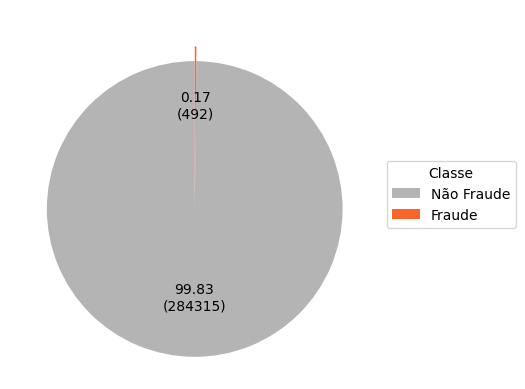

In [12]:
def autopct_format(values):
    def myfmt(pct):
        total = sum(values)
        val = int(round(pct * total/100.0))
        return f'{pct:.2f}\n({val})'
    return myfmt

s = df['Class'].value_counts()
labels = ["Não Fraude", "Fraude"]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    s, 
    labels=None,  # Não mostrar rótulos diretamente no gráfico
    autopct=autopct_format(s), 
    colors=["#b4b4b4", "#fc6529"], 
    startangle=90, 
    explode=(0.1, 0)
)

# Adiciona a legenda ao lado direito
ax.legend(wedges, labels, title="Classe", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Univariate data analysis

In this section, you should perform univariate data analysis on at least **20 variables**.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (Gaussian, binomial, exponential, etc.);
2. Skewness;
3. Kurtosis;
4. Mean, standard deviation, and what they stand for in the context of the dataset.

Ensure that each variable is **plotted correctly** based on its type. For instance, make sure scatterplots are not used for categorical data and so forth.

In [13]:
def analise_variavel(coluna:str) -> None:
    sns.histplot(x=df[coluna], bins=20, kde=True)

    plt.title(f"Distribuição da variável: {coluna}")
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.show()

    sns.boxplot(x=df[coluna])
    plt.show()
    df[coluna].describe()

    print("Variável: ", coluna)
    print(f"Média: \n{df[coluna].mean()}")
    print(f"Médiana: \n{df[coluna].median()}")
    print(f"Moda: \n{df[coluna].mode()}")
    print(f"Desvio Padrão: \n{df[coluna].std()}")
    print(f"Máximo: \n{df[coluna].max()}")
    print(f"Q1: \n{df[coluna].quantile(0.25)}")
    print(f"Q2: \n{df[coluna].quantile(0.5)}")
    print(f"Q3: \n{df[coluna].quantile(0.75)}")
    print(f"IQR: \n{df[coluna].quantile(0.75) - df[coluna].quantile(0.25)}")
    print(f"Fim do whisker inferior: \n{df[coluna].quantile(0.25) - 1.5 * (df[coluna].quantile(0.75) - df[coluna].quantile(0.25))}")
    print(f"Fim do whisker superior: \n{df[coluna].quantile(0.75) + 1.5 * (df[coluna].quantile(0.75) - df[coluna].quantile(0.25))}")
    print(f"Skewness: \n{df[coluna].skew()}")
    print(f"Kurtosis: \n{df[coluna].kurt()}")
    print(f"Mínimo: \n{df[coluna].min()}")
    print("-" * 30)

# Amount_Interval (Intervalo de Valor das Transações )

> Análise:

Atraves da analise da varivel criada foi possivel verificar que a maior parte das transações tiveram seu valor até 5 Euros e outra grande parte teve seu valor acima de 100 euros, fazendo com que o primeiro quartil possivelmente fique perto desse valor e que o Terceiro quartil fique perto dos 100 euros, o que pode indicar que o boxplot não indique valores até 100 euros como possiveis outliers



In [14]:
df["Amount_Interval"].value_counts()

Amount_Interval
até 5            69032
Maior que 100    56508
5 a 10           31232
10 a 15          22386
15 a 20          16480
20 a 25          11224
25 a 30          10726
50 a 60           9908
35 a 40           9150
60 a 70           7797
45 a 50           7469
70 a 80           7447
30 a 35           7074
40 a 45           6272
80 a 90           6270
90 a 100          5832
Name: count, dtype: int64

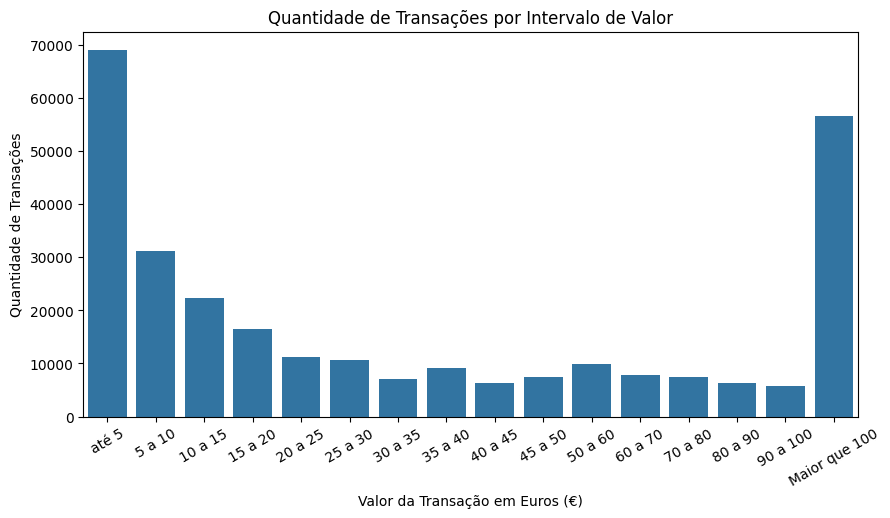

In [15]:
plt.figure(figsize=(10, 5))

sns.countplot(x=df["Amount_Interval"])

plt.xlabel("Valor da Transação em Euros (€)")
plt.ylabel("Quantidade de Transações")
plt.title("Quantidade de Transações por Intervalo de Valor")
plt.xticks(rotation=30)
plt.show()

# Time_Interval (Intervalo de Tempo desde a primeira Transação )

> Análise:

Atraves da analise da varivel criada foi possivel verificar que a maior parte das transações ocorreram entre 10 a 24 horas e 30 a 48 horas após a primeira transação, indicando que possa ter um IQR grande fazendo com que os whiskers do boxplot para a variavel time não encontre nenhum possivel outlier

outro ponto que tambem é possivel concluir, e que se caso existisse valores nulos nessa variavel em pouca quantidade seria possivel utilizar esse dois principais intervalos para imputação.

_OBS: porém para essa base, não existem valores nulos_

In [16]:
df["Time_Interval"].value_counts()

Time_Interval
36h a 42h         49587
42h a 48h         42988
10h a 15h         40153
15h a 20h         40106
30h a 36h         35851
20h a 24h         33932
5h a 10h          19937
24h a 30h         11594
1h a 5h            6695
até 1h             3964
Maior que 48 h        0
Name: count, dtype: int64

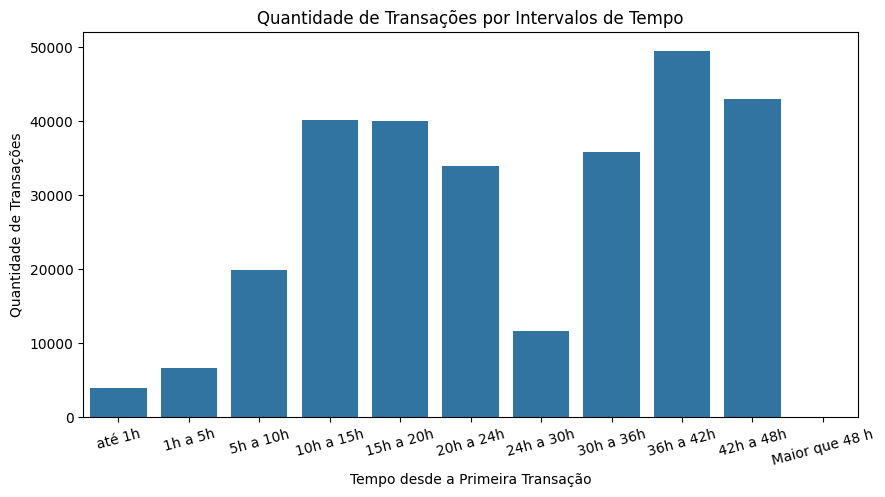

In [17]:
plt.figure(figsize=(10, 5))

sns.countplot(x=df["Time_Interval"])

plt.xlabel("Tempo desde a Primeira Transação")
plt.ylabel("Quantidade de Transações")
plt.title("Quantidade de Transações por Intervalos de Tempo")
plt.xticks(rotation=15)
plt.show()

### V1

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.)
- Assimetria: Assimetria Negativa
- Kurtosis: leptocurtica
------------
- Média: 1,1683749838001528e-15
- Desvio Padrão: 1,9586

> Análise:

 Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

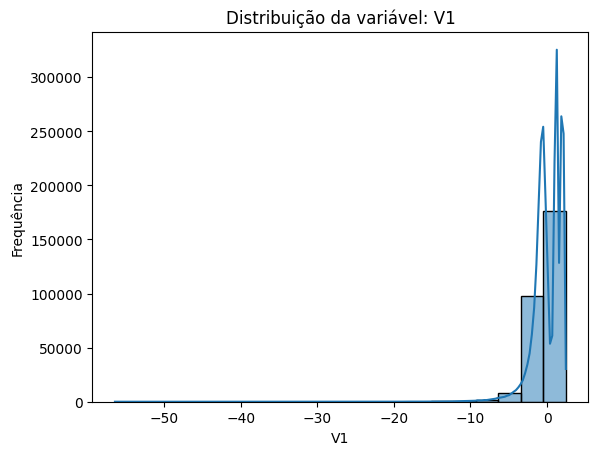

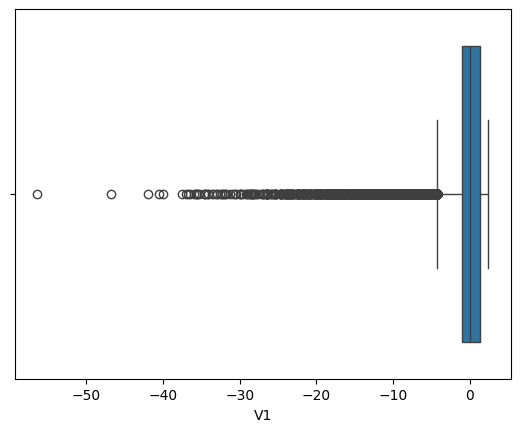

Variável:  V1
Média: 
1.1683749838001528e-15
Médiana: 
0.0181087991615309
Moda: 
0    1.245674
1    2.055797
Name: V1, dtype: float64
Desvio Padrão: 
1.9586958038574858
Máximo: 
2.45492999121121
Q1: 
-0.920373384390322
Q2: 
0.0181087991615309
Q3: 
1.315641693877865
IQR: 
2.236015078268187
Fim do whisker inferior: 
-4.274396001792603
Fim do whisker superior: 
4.669664311280146
Skewness: 
-3.2806673027560405
Kurtosis: 
32.48667948607062
Mínimo: 
-56.407509631329
------------------------------


In [18]:
# place as many cells to plot the visualizations,
# as well as to describe the main findings

analise_variavel("V1")

### V2

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.)
- Assimetria: Assimetria Negativa
- Kurtosis: leptocurtica
------------
- Média: 3,416908049651284e-16
- Desvio Padrão: 1,6513

> Análise: 

Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

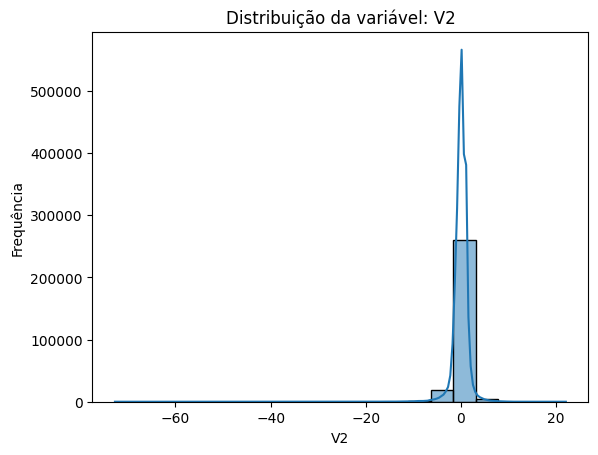

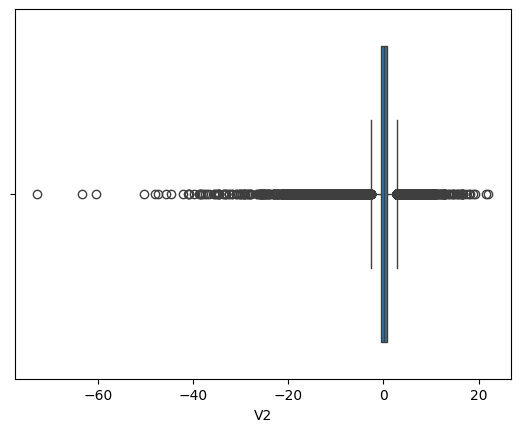

Variável:  V2
Média: 
3.416908049651284e-16
Médiana: 
0.0654855563960555
Moda: 
0   -0.326668
1    0.166975
Name: V2, dtype: float64
Desvio Padrão: 
1.6513085794769975
Máximo: 
22.0577289904909
Q1: 
-0.598549913464916
Q2: 
0.0654855563960555
Q3: 
0.8037238712400945
IQR: 
1.4022737847050104
Fim do whisker inferior: 
-2.7019605905224315
Fim do whisker superior: 
2.90713454829761
Skewness: 
-4.624865573285336
Kurtosis: 
95.7731059638466
Mínimo: 
-72.7157275629303
------------------------------


In [19]:
analise_variavel("V2")

### V3
- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.)
- Assimetria: Assimetria Negativa
- Kurtosis: leptocurtica
------------
- Média: -1,379536707896593e-15
- Desvio Padrão: 1,5162

> Análise:

 Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

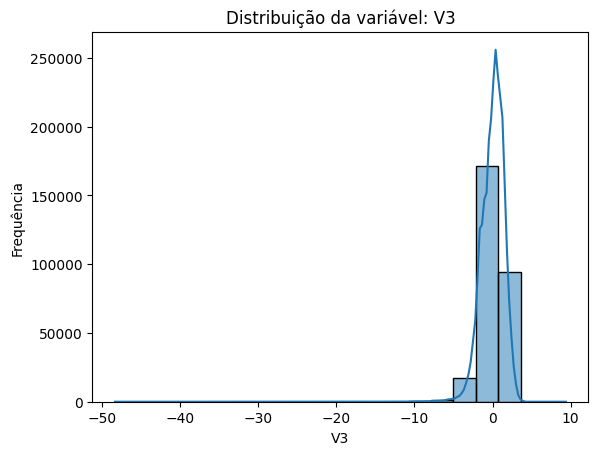

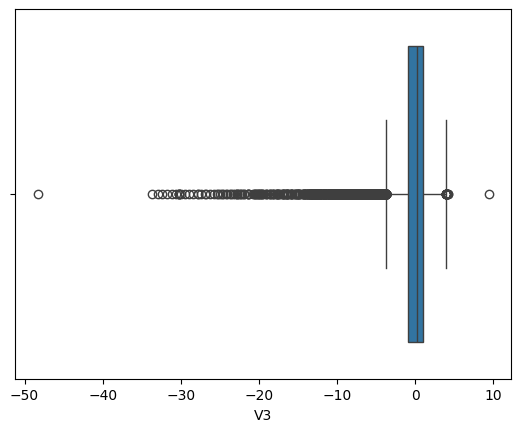

Variável:  V3
Média: 
-1.379536707896593e-15
Médiana: 
0.179846343563544
Moda: 
0   -2.752041
1    0.488306
Name: V3, dtype: float64
Desvio Padrão: 
1.516255005177772
Máximo: 
9.38255843282114
Q1: 
-0.8903648381551406
Q2: 
0.179846343563544
Q3: 
1.027195542465555
IQR: 
1.9175603806206956
Fim do whisker inferior: 
-3.7667054090861836
Fim do whisker superior: 
3.9035361133965982
Skewness: 
-2.2401554402404193
Kurtosis: 
26.619550806363996
Mínimo: 
-48.3255893623954
------------------------------


In [20]:
analise_variavel("V3")

### Amount (Quantidade)
- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.)
- Assimetria: Assimetria Positiva
- Kurtosis: leptocurtica
------------
- Média: 88,3496
- Desvio Padrão: 250,120

> Análise: 

esses valores indicam que é na média as transações que ocorreram foram com o valor de 88,34 €

a trasacao com o maior valor foi com o valor de 25.691,16 €

foram detectados varios outliers dentro dos valores da variavel, conforme visto no boxplot 

isso leva-nos a concluir as suspeitas na análise da variavel de intervalo de transações esteja correto, pois o primeiro quartil está com 5,6 euros e que os valores até 100 euros não seriam considerados outliers 

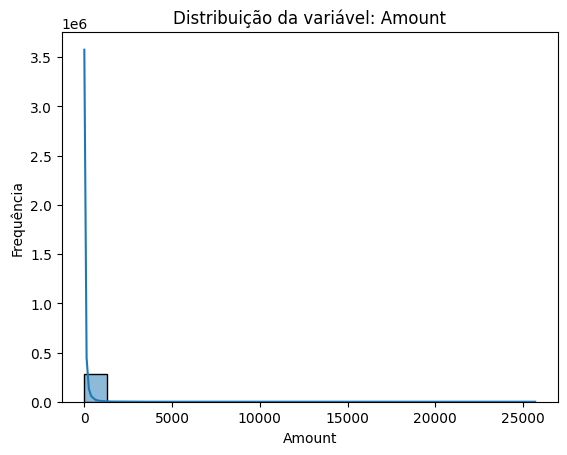

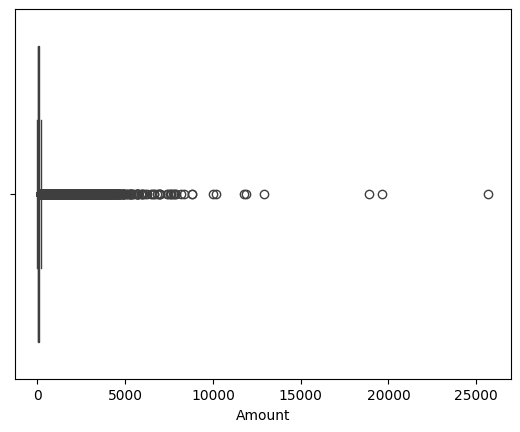

Variável:  Amount
Média: 
88.34961925093133
Médiana: 
22.0
Moda: 
0    1.0
Name: Amount, dtype: float64
Desvio Padrão: 
250.1201092401885
Máximo: 
25691.16
Q1: 
5.6
Q2: 
22.0
Q3: 
77.16499999999999
IQR: 
71.565
Fim do whisker inferior: 
-101.7475
Fim do whisker superior: 
184.5125
Skewness: 
16.977724453761024
Kurtosis: 
845.0926455465277
Mínimo: 
0.0
------------------------------


In [21]:
analise_variavel("Amount")

### Time (tempo de transação)

- Distribuição: Bimodal
- Assimetria: Assimetria Negativa
- Kurtosis: platicurtica
------------
- Média: 94.813,85
- Desvio Padrão: 47.488,14

> Análise: 

esses valores indicam que é na média as transações que ocorreram foram com  94.813,85 segundos depois da primeira transação

$$\approx 26 horas \approx(\text{1 dia e 1 hora})$$ 

a transacao que ocorreu num tempo mais distante da primeira transação foi de 172.792 segundos 

$$\approx 48 horas \approx (\text{2 dias})$$ 


75% das transações ocorreram depois de 139.320 segundos da primeira transação $$\approx \text{ 38 horas } \approx \text{ 1 dia e 14 horas}$$ 

É possivel verificar duas faixas que estão concentradas as frequencias, a faixa de: $$\approx \text{ 30000 segundos a } \approx \text{80000 segundos}$$  

e

$$\approx \text{ 120000 segundos a } \approx \text{170000 segundos}$$  

isso significa que grande parte dos dados estão entre esses dois intervalos

Tambem é possivel confirmar as suspeitas apontadas na Análise da variavel de intervalo de tempo pois com o boxplot não foi possivel verificar a existencia de outliters para a variavel time

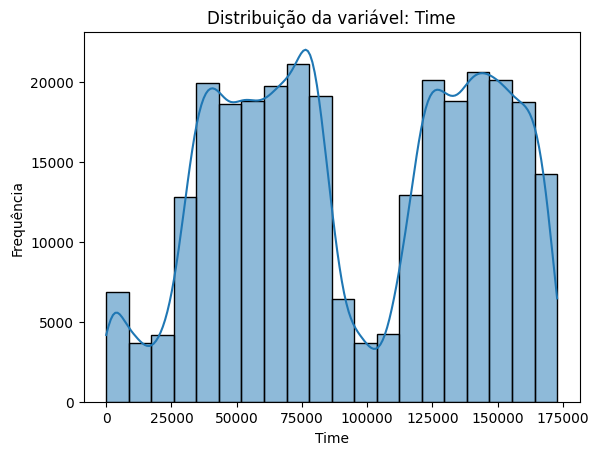

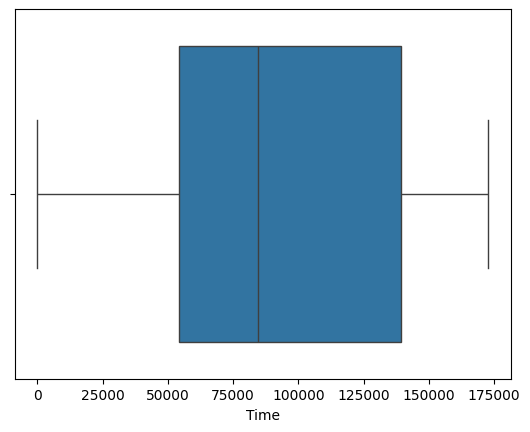

Variável:  Time
Média: 
94813.85957508067
Médiana: 
84692.0
Moda: 
0    163152.0
Name: Time, dtype: float64
Desvio Padrão: 
47488.14595456617
Máximo: 
172792.0
Q1: 
54201.5
Q2: 
84692.0
Q3: 
139320.5
IQR: 
85119.0
Fim do whisker inferior: 
-73477.0
Fim do whisker superior: 
266999.0
Skewness: 
-0.0355676180063216
Kurtosis: 
-1.2935300508989838
Mínimo: 
0.0
------------------------------


In [22]:
analise_variavel("Time")

In [23]:
df["Time"].quantile(0.75)

139320.5

### V4

- Distribuição: - Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetria Positiva
- Kurtosis: leptocurtica
------------
- Média: 2,0740951198584196e-15
- Desvio Padrão: 1,41586

> Análise:

 Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

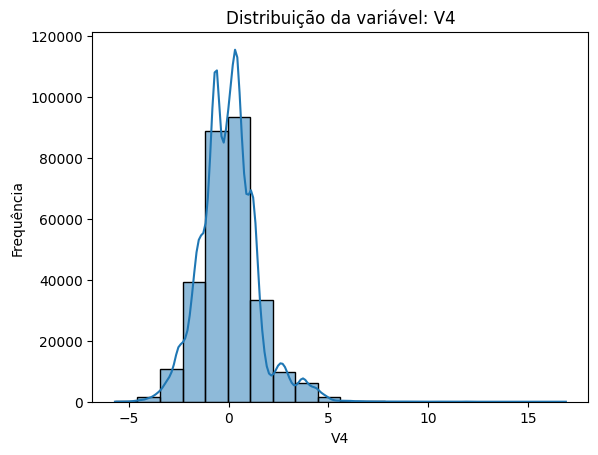

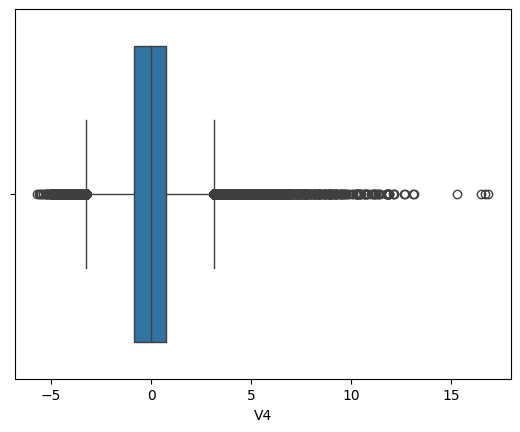

Variável:  V4
Média: 
2.0740951198584196e-15
Médiana: 
-0.0198465294811989
Moda: 
0   -0.842316
1    0.635322
Name: V4, dtype: float64
Desvio Padrão: 
1.4158685749409203
Máximo: 
16.8753440335975
Q1: 
-0.848640116331273
Q2: 
-0.0198465294811989
Q3: 
0.7433412894685876
IQR: 
1.5919814057998605
Fim do whisker inferior: 
-3.236612225031064
Fim do whisker superior: 
3.1313133981683787
Skewness: 
0.676292097985747
Kurtosis: 
2.6354549146787125
Mínimo: 
-5.68317119816995
------------------------------


In [24]:
analise_variavel("V4")

### V5

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetria Negativa
- Kurtosis: leptocurtica
------------
- Média: 9,604066317127324e-16
- Desvio Padrão: 1,38024

> Análise:

 Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

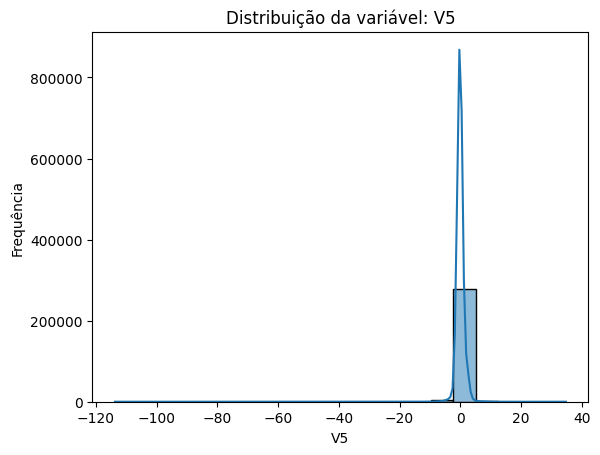

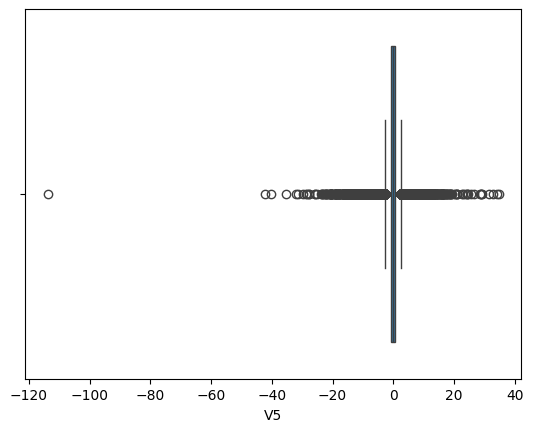

Variável:  V5
Média: 
9.604066317127324e-16
Médiana: 
-0.0543358267364858
Moda: 
0   -0.562777
1    2.463072
Name: V5, dtype: float64
Desvio Padrão: 
1.3802467340314395
Máximo: 
34.8016658766686
Q1: 
-0.6915970708876575
Q2: 
-0.0543358267364858
Q3: 
0.611926439735193
IQR: 
1.3035235106228504
Fim do whisker inferior: 
-2.646882336821933
Fim do whisker superior: 
2.5672117056694685
Skewness: 
-2.425901495952054
Kurtosis: 
206.90455995692022
Mínimo: 
-113.743306711146
------------------------------


In [25]:
analise_variavel("V5")

### V6

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetria Positiva
- Kurtosis: leptocurtica
------------
- Média: 1,4873130132010145e-15
- Desvio Padrão: 1,3322

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

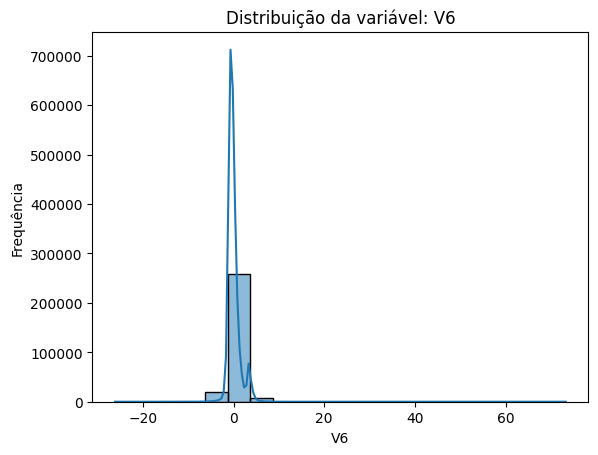

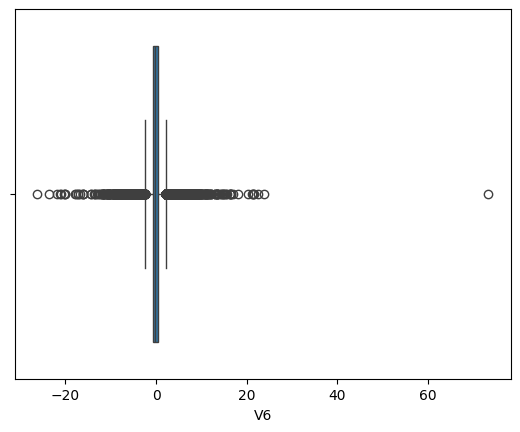

Variável:  V6
Média: 
1.4873130132010145e-15
Médiana: 
-0.274187076506651
Moda: 
0   -1.011073
1    3.173856
Name: V6, dtype: float64
Desvio Padrão: 
1.3322710897575756
Máximo: 
73.3016255459646
Q1: 
-0.768295608460489
Q2: 
-0.274187076506651
Q3: 
0.39856489635610504
IQR: 
1.166860504816594
Fim do whisker inferior: 
-2.51858636568538
Fim do whisker superior: 
2.148855653580996
Skewness: 
1.826580664998085
Kurtosis: 
42.64249396253933
Mínimo: 
-26.1605059358433
------------------------------


In [26]:
analise_variavel("V6")

### V7

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetria Positiva
- Kurtosis: leptocurtica
------------
- Média: -5,556467295694611e-16
- Desvio Padrão: 1,23709

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

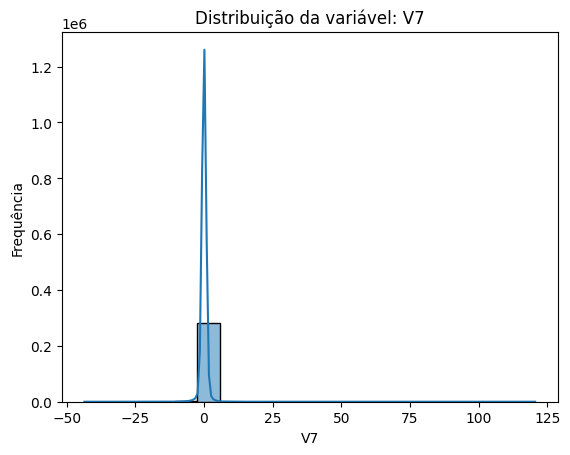

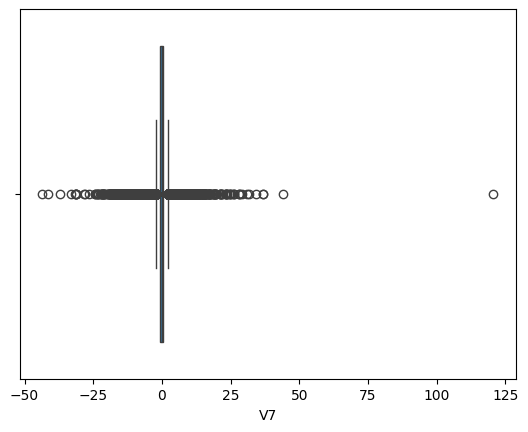

Variável:  V7
Média: 
-5.556467295694611e-16
Médiana: 
0.0401030827945351
Moda: 
0   -0.432126
1    0.014953
Name: V7, dtype: float64
Desvio Padrão: 
1.2370935981826663
Máximo: 
120.589493945238
Q1: 
-0.5540758790365226
Q2: 
0.0401030827945351
Q3: 
0.5704360728775986
IQR: 
1.1245119519141211
Fim do whisker inferior: 
-2.240843806907704
Fim do whisker superior: 
2.2572040007487804
Skewness: 
2.553907417429514
Kurtosis: 
405.6074170083754
Mínimo: 
-43.5572415712451
------------------------------


In [27]:
analise_variavel("V7")

### V8

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetria Negativa
- Kurtosis: leptocurtica
------------
- Média: 1,2134813634275587e-16
- Desvio Padrão: 1,19435

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

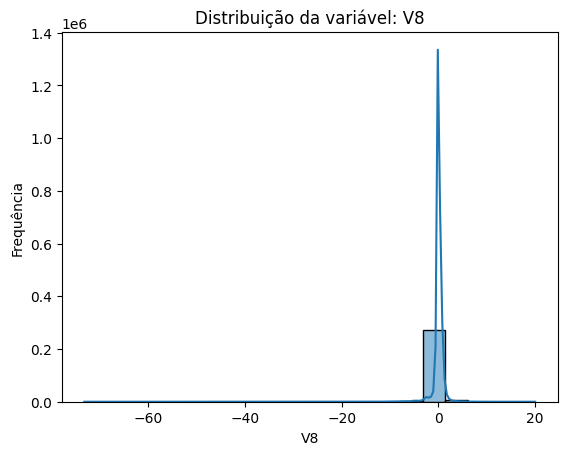

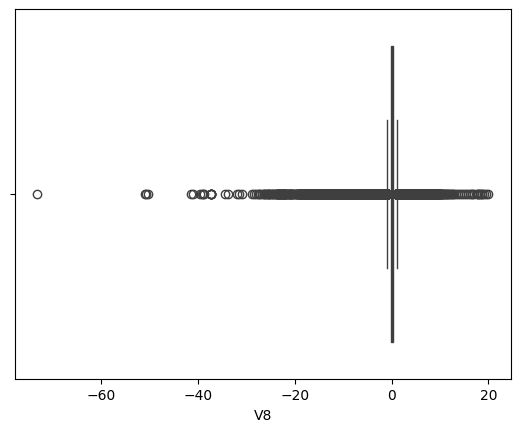

Variável:  V8
Média: 
1.2134813634275587e-16
Médiana: 
0.0223580364366631
Moda: 
0   -0.160211
1    0.727706
Name: V8, dtype: float64
Desvio Padrão: 
1.1943529026692037
Máximo: 
20.0072083651213
Q1: 
-0.2086297440394665
Q2: 
0.0223580364366631
Q3: 
0.327345861923449
IQR: 
0.5359756059629155
Fim do whisker inferior: 
-1.0125931529838397
Fim do whisker superior: 
1.1313092708678223
Skewness: 
-8.521944194777976
Kurtosis: 
220.58697362515306
Mínimo: 
-73.2167184552674
------------------------------


In [28]:
analise_variavel("V8")

### V9

- Distribuição: - Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Simetrica
- Kurtosis: leptocurtica
------------
- Média: -2,4063305498905906e-15
- Desvio Padrão: 1,098

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

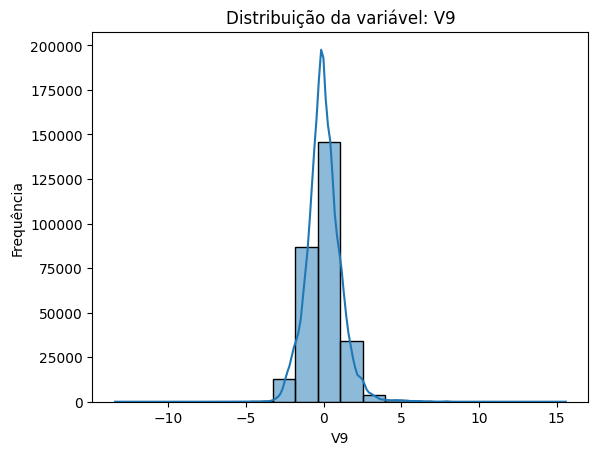

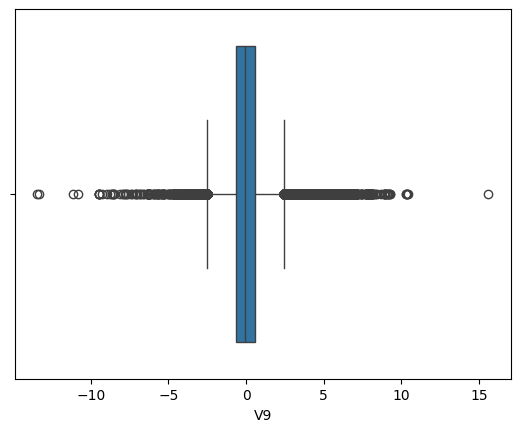

Variável:  V9
Média: 
-2.4063305498905906e-15
Médiana: 
-0.051428731550349
Moda: 
0    0.170362
1    0.608606
Name: V9, dtype: float64
Desvio Padrão: 
1.0986320892243193
Máximo: 
15.5949946071278
Q1: 
-0.6430975702665915
Q2: 
-0.051428731550349
Q3: 
0.5971390302822686
IQR: 
1.24023660054886
Fim do whisker inferior: 
-2.503452471089882
Fim do whisker superior: 
2.457493931105559
Skewness: 
0.5546797719063509
Kurtosis: 
3.7313106141412087
Mínimo: 
-13.4340663182301
------------------------------


In [29]:
analise_variavel("V9")

### V10

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetrica Positiva
- Kurtosis: leptocurtica
------------
- Média: 2,2390527426993533e-15
- Desvio Padrão: 1,088

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

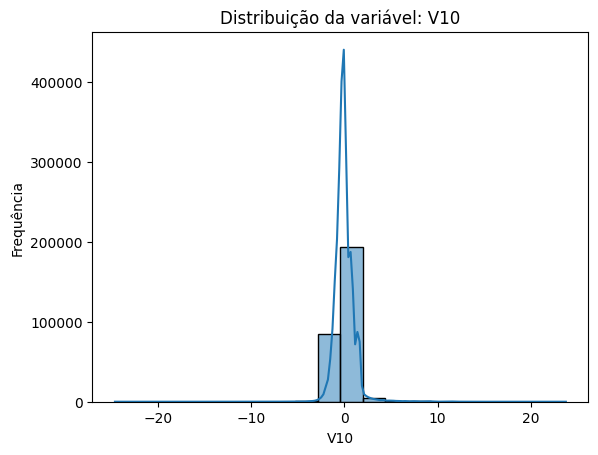

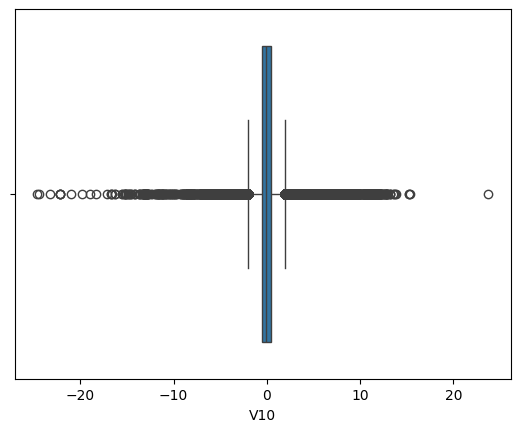

Variável:  V10
Média: 
2.2390527426993533e-15
Médiana: 
-0.0929173835961975
Moda: 
0   -0.075186
1   -0.044575
Name: V10, dtype: float64
Desvio Padrão: 
1.0888497654025169
Máximo: 
23.7451361206545
Q1: 
-0.5354257264933235
Q2: 
-0.0929173835961975
Q3: 
0.453923445139507
IQR: 
0.9893491716328305
Fim do whisker inferior: 
-2.0194494839425694
Fim do whisker superior: 
1.9379472025887527
Skewness: 
1.1871405899625278
Kurtosis: 
31.98823877949119
Mínimo: 
-24.5882624372475
------------------------------


In [30]:
analise_variavel("V10")

### V11

- Distribuição: semelhante à distribuição Normal
- Assimetria: Assimetrica Positiva
- Kurtosis: leptocurtica
------------
- Média: 1,673326932726423e-15
- Desvio Padrão: 1,02071

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

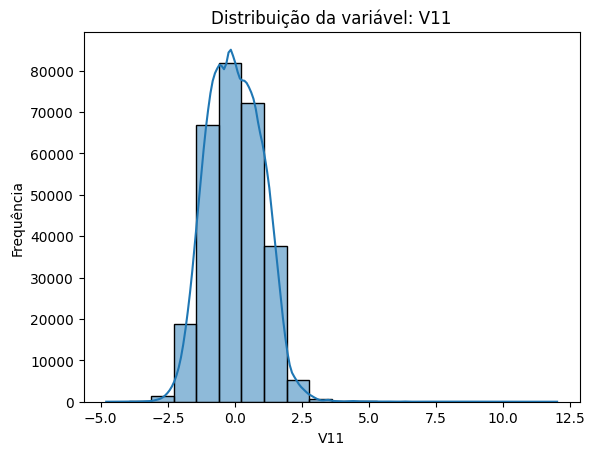

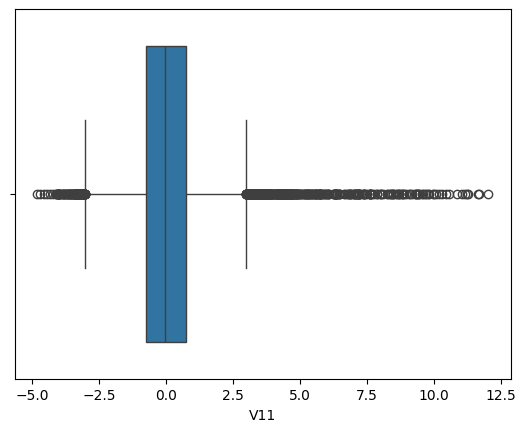

Variável:  V11
Média: 
1.673326932726423e-15
Médiana: 
-0.032757354499007
Moda: 
0   -0.356749
1    0.063504
Name: V11, dtype: float64
Desvio Padrão: 
1.0207130277115584
Máximo: 
12.0189131816199
Q1: 
-0.7624941955129775
Q2: 
-0.032757354499007
Q3: 
0.739593407321606
IQR: 
1.5020876028345835
Fim do whisker inferior: 
-3.015625599764853
Fim do whisker superior: 
2.9927248115734812
Skewness: 
0.35650585548882013
Kurtosis: 
1.6339212577978683
Mínimo: 
-4.79747346479757
------------------------------


In [31]:
analise_variavel("V11")

### V12

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetrica Negativa
- Kurtosis: leptocurtica
------------
- Média: -1,2470117695222676e-15
- Desvio Padrão: 0,9992

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

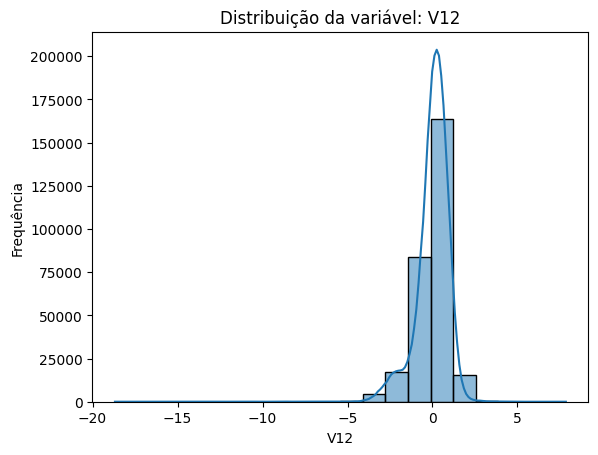

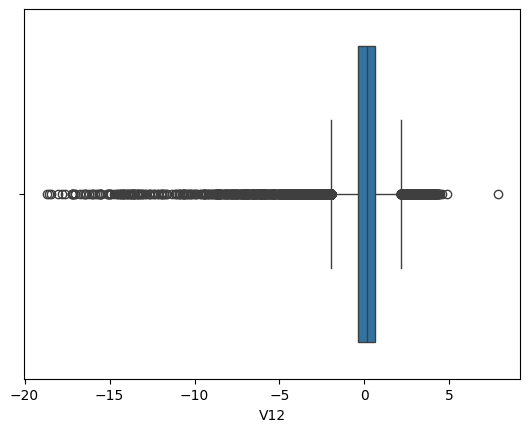

Variável:  V12
Média: 
-1.2470117695222676e-15
Médiana: 
0.140032588291332
Moda: 
0   -0.073460
1    0.350564
Name: V12, dtype: float64
Desvio Padrão: 
0.9992013895301447
Máximo: 
7.8483920756446
Q1: 
-0.40557148544041355
Q2: 
0.140032588291332
Q3: 
0.618238032946136
IQR: 
1.0238095183865497
Fim do whisker inferior: 
-1.941285763020238
Fim do whisker superior: 
2.1539523105259604
Skewness: 
-2.278400935410618
Kurtosis: 
20.241869662225426
Mínimo: 
-18.6837146333443
------------------------------


In [32]:
analise_variavel("V12")

### V13

- Distribuição: Semelhante à Normal
- Assimetria: Assimetrica Positiva
- Kurtosis: leptocurtica
------------
- Média: 8,190001274383203e-16
- Desvio Padrão: -0,995

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

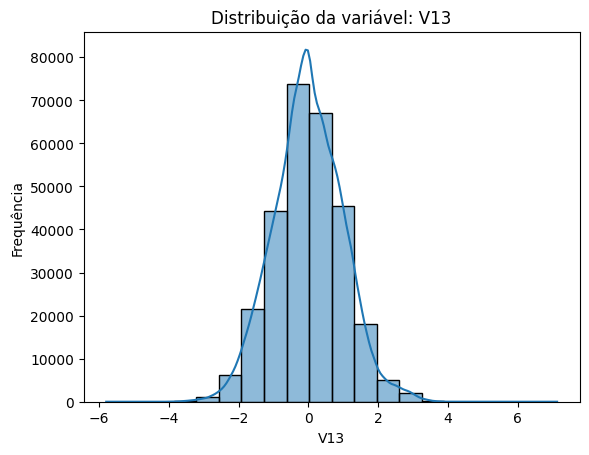

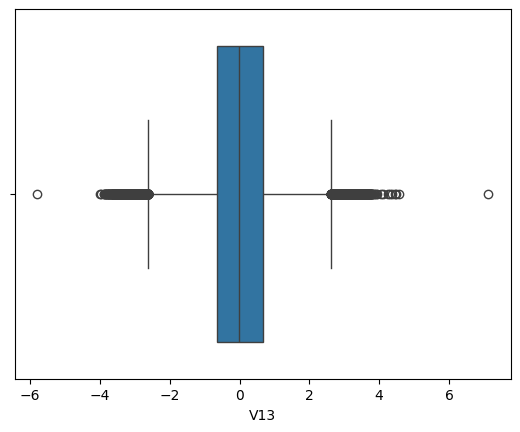

Variável:  V13
Média: 
8.190001274383203e-16
Médiana: 
-0.0135680567852071
Moda: 
0   -0.517760
1   -0.141238
Name: V13, dtype: float64
Desvio Padrão: 
0.9952742301251534
Máximo: 
7.12688295859376
Q1: 
-0.6485392991145684
Q2: 
-0.0135680567852071
Q3: 
0.662504959439974
IQR: 
1.3110442585545425
Fim do whisker inferior: 
-2.6151056869463822
Fim do whisker superior: 
2.629071347271788
Skewness: 
0.06523345790658323
Kurtosis: 
0.19529978783246627
Mínimo: 
-5.79188120632084
------------------------------


In [33]:
analise_variavel("V13")

### V14

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetrica Negativa
- Kurtosis: leptocurtica
------------
- Média: 1,2072942051600827e-15
- Desvio Padrão: 0,958

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

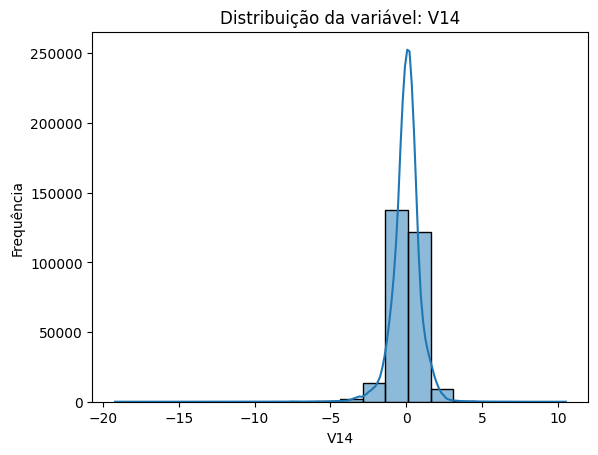

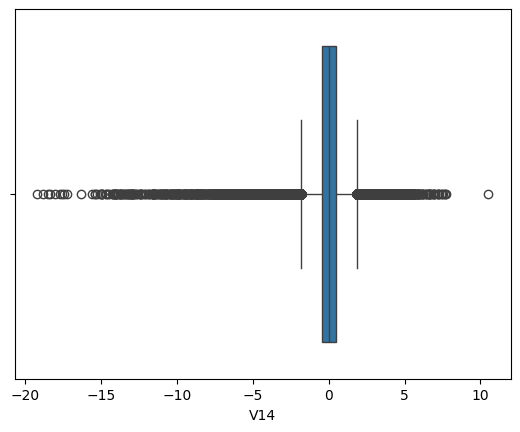

Variável:  V14
Média: 
1.2072942051600827e-15
Médiana: 
0.0506013193100486
Moda: 
0    0.406969
1    0.690972
Name: V14, dtype: float64
Desvio Padrão: 
0.9585956112570637
Máximo: 
10.5267660517847
Q1: 
-0.4255740124549935
Q2: 
0.0506013193100486
Q3: 
0.493149849218149
IQR: 
0.9187238616731425
Fim do whisker inferior: 
-1.803659804964707
Fim do whisker superior: 
1.8712356417278626
Skewness: 
-1.9951758402683304
Kurtosis: 
23.879461844938454
Mínimo: 
-19.2143254902614
------------------------------


In [34]:
analise_variavel("V14")

### V15
- Distribuição: Semelhante a Normal.
- Assimetria: Assimetrica Positiva
- Kurtosis: leptocurtica
------------
- Média: 4,887455859804944e-15
- Desvio Padrão: 0,915

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)


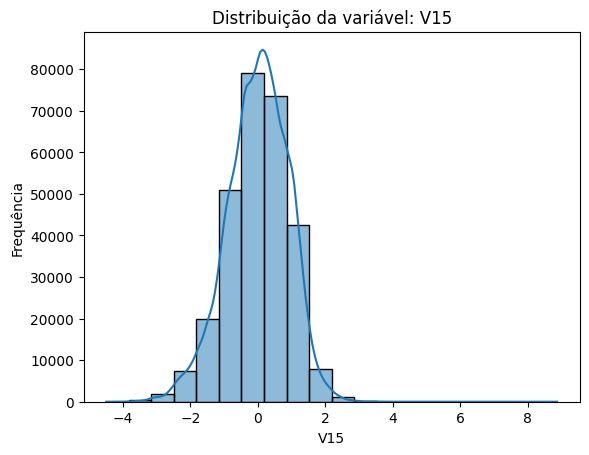

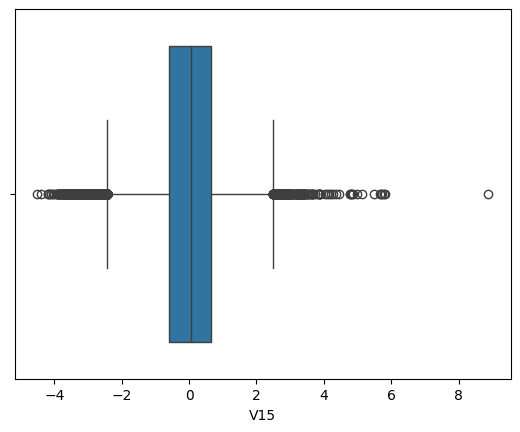

Variável:  V15
Média: 
4.887455859804944e-15
Médiana: 
0.0480715497626106
Moda: 
0    1.124147
1    1.275257
Name: V15, dtype: float64
Desvio Padrão: 
0.9153160116104391
Máximo: 
8.87774159774277
Q1: 
-0.582884279157456
Q2: 
0.0480715497626106
Q3: 
0.648820806317158
IQR: 
1.2317050854746139
Fim do whisker inferior: 
-2.430441907369377
Fim do whisker superior: 
2.496378434529079
Skewness: 
-0.3084229821359239
Kurtosis: 
0.28476908376068133
Mínimo: 
-4.49894467676621
------------------------------


In [35]:
analise_variavel("V15")

### V16

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetrica Positiva
- Kurtosis: leptocurtica
------------
- Média: 1.4377159541859243e-15
- Desvio Padrão: 0,8762

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)


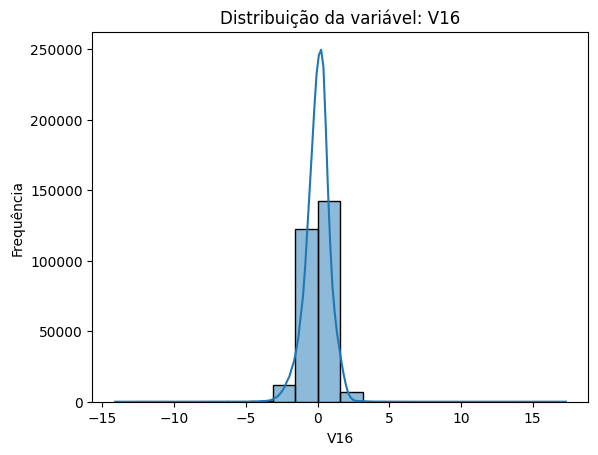

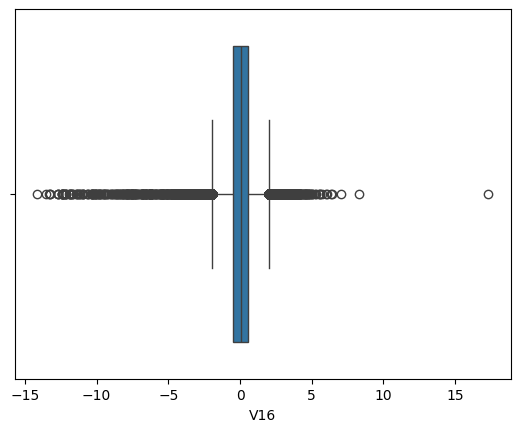

Variável:  V16
Média: 
1.4377159541859243e-15
Médiana: 
0.0664133205843014
Moda: 
0   -0.371962
1    0.342470
Name: V16, dtype: float64
Desvio Padrão: 
0.8762528873883703
Máximo: 
17.3151115176278
Q1: 
-0.46803676671289796
Q2: 
0.0664133205843014
Q3: 
0.523296312475344
IQR: 
0.991333079188242
Fim do whisker inferior: 
-1.955036385495261
Fim do whisker superior: 
2.010295931257707
Skewness: 
-1.100966276051066
Kurtosis: 
10.419131320644887
Mínimo: 
-14.1298545174931
------------------------------


In [36]:
analise_variavel("V16")

### V17

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetrica Negativa
- Kurtosis: leptocurtica
------------
- Média: -3.7721706856547467e-16
- Desvio Padrão: 0,8493

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)


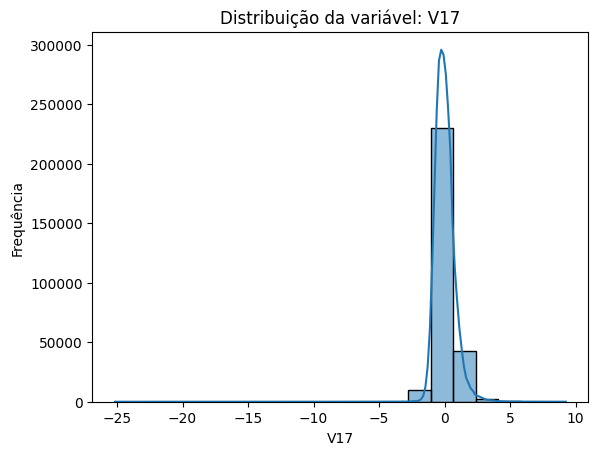

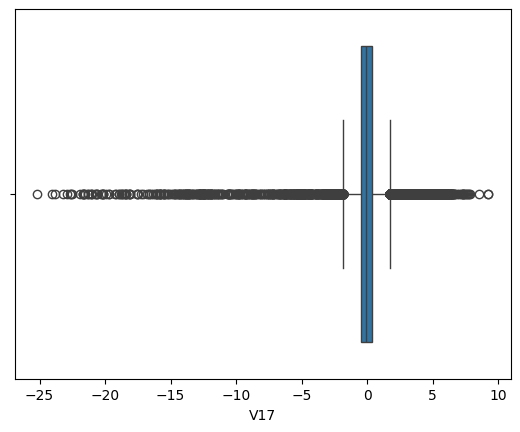

Variável:  V17
Média: 
-3.7721706856547467e-16
Médiana: 
-0.0656757538072252
Moda: 
0   -0.601957
1   -0.374656
Name: V17, dtype: float64
Desvio Padrão: 
0.8493370636743893
Máximo: 
9.25352625047285
Q1: 
-0.483748313707048
Q2: 
-0.0656757538072252
Q3: 
0.3996749826503845
IQR: 
0.8834232963574324
Fim do whisker inferior: 
-1.8088832582431966
Fim do whisker superior: 
1.7248099271865331
Skewness: 
-3.8449144738706202
Kurtosis: 
94.7997191039743
Mínimo: 
-25.1627993693248
------------------------------


In [37]:
analise_variavel("V17")

### V18

- Distribuição: Semelhança com a Normal.
- Assimetria: Assimetrica Negativa
- Kurtosis: leptocurtica
------------
- Média: 9,564149167014576e-16
- Desvio Padrão: 0,8381

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

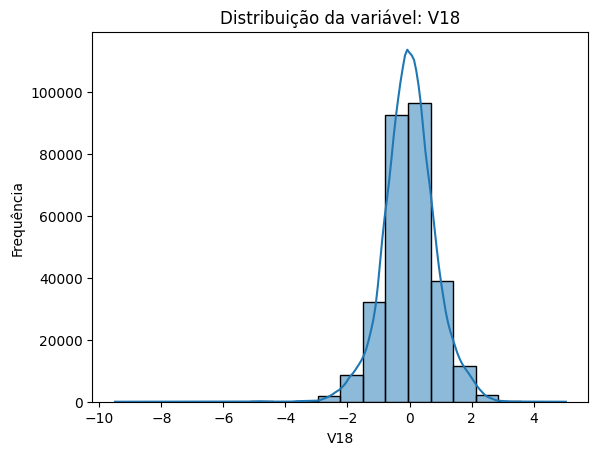

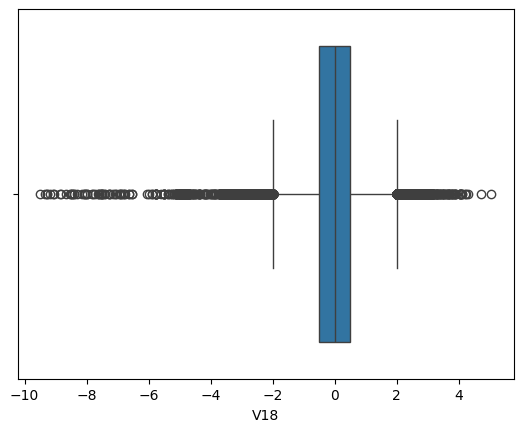

Variável:  V18
Média: 
9.564149167014576e-16
Médiana: 
-0.0036363123546992
Moda: 
0   -0.438992
1   -0.052640
Name: V18, dtype: float64
Desvio Padrão: 
0.8381762095288414
Máximo: 
5.04106918541184
Q1: 
-0.498849798665041
Q2: 
-0.0036363123546992
Q3: 
0.5008067468872159
IQR: 
0.9996565455522569
Fim do whisker inferior: 
-1.9983346169934264
Fim do whisker superior: 
2.0002915652156013
Skewness: 
-0.25988026809430603
Kurtosis: 
2.5783408337335967
Mínimo: 
-9.49874592104677
------------------------------


In [38]:
analise_variavel("V18")

### V19

- Distribuição: Semelhança com a Normal.
- Assimetria: Assimetrica Negativa
- Kurtosis: leptocurtica
------------
- Média: 1,0399166050935636e-15
- Desvio Padrão: 0,81404

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

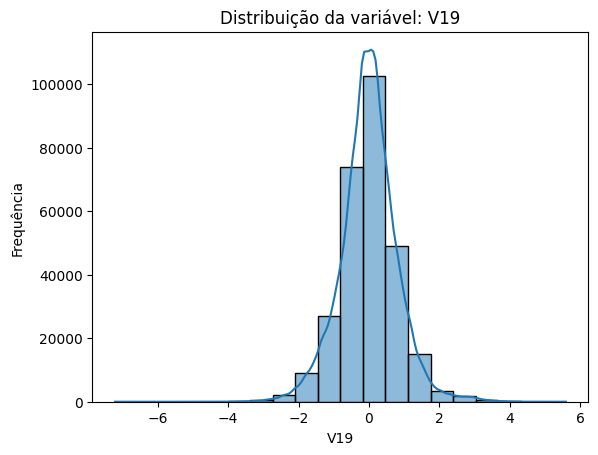

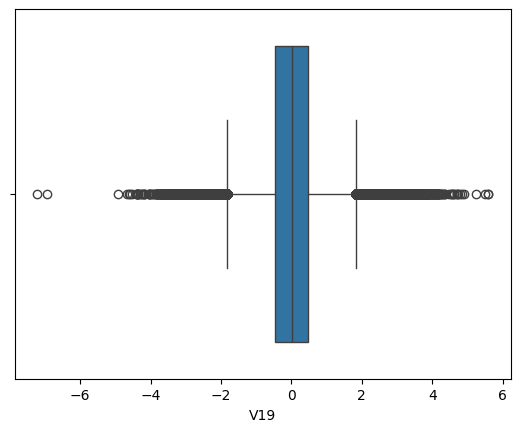

Variável:  V19
Média: 
1.0399166050935636e-15
Médiana: 
0.0037348229952574
Moda: 
0   -0.330590
1   -0.116091
Name: V19, dtype: float64
Desvio Padrão: 
0.8140405007685785
Máximo: 
5.59197142733558
Q1: 
-0.4562989187444475
Q2: 
0.0037348229952574
Q3: 
0.458949355762679
IQR: 
0.9152482745071264
Fim do whisker inferior: 
-1.8291713305051371
Fim do whisker superior: 
1.8318217675233686
Skewness: 
0.10919175998147104
Kurtosis: 
1.72496978122751
Mínimo: 
-7.21352743017759
------------------------------


In [39]:
analise_variavel("V19")

### V20

- Distribuição: Não foi possivel definir a distribuição, pois não se enquadra em nenhuma das catégorias principais (Gaussian, binomial, exponential, etc.).
- Assimetria: Assimetrica Negativa
- Kurtosis: leptocurtica
------------
- Média: 6.406203628719748e-16
- Desvio Padrão: 0,770925

> Análise:

> Não é possivel definir o que significa esses valores no caso do nosso dataset, devido ao campo ser resultado de um PCA (técnica de redução de dimensionalidade para proteger identidades de usuarios e recursos confidenciais)

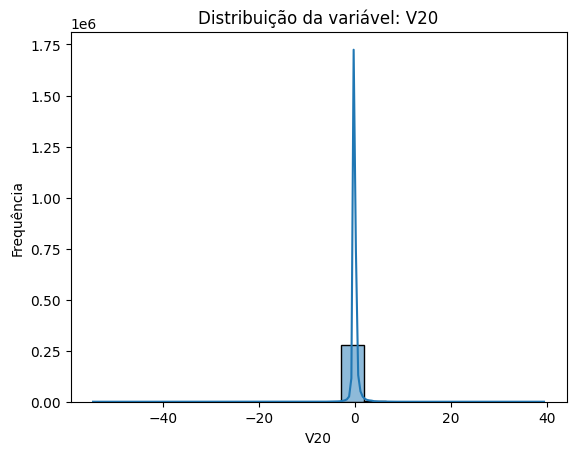

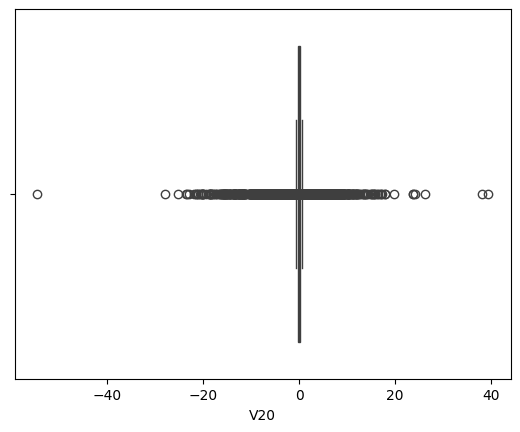

Variável:  V20
Média: 
6.406203628719748e-16
Médiana: 
-0.0624810924603664
Moda: 
0   -0.18037
1   -0.13208
Name: V20, dtype: float64
Desvio Padrão: 
0.7709250248871167
Máximo: 
39.4209042482199
Q1: 
-0.21172136467424701
Q2: 
-0.0624810924603664
Q3: 
0.1330408409942945
IQR: 
0.34476220566854154
Fim do whisker inferior: 
-0.7288646731770594
Fim do whisker superior: 
0.6501841494971068
Skewness: 
-2.037155299081399
Kurtosis: 
271.01611295041545
Mínimo: 
-54.497720494566
------------------------------


In [40]:
analise_variavel("V20")

In [41]:
# if you realize you need to further clean your data here, there is no problem,
# yet, make sure you are describing the entire process and the rationale
# behind your choices here

# Multivariate data analysis

In this section, you should plot at least **5 multivariate visualizations**. The key here is to investigate underlying correlations and behaviors within the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **ONE** non-obvious behavior in the data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. Explain why you have selected these specific variables and what you expect to discover through their relationship;
2. Determine what kind of visualization is the most suitable;
3. Report the findings and discuss whether they corroborate or not the aforementioned hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For example, consider applying techniques such as PCA, t-SNE, or even others that we haven't covered in the lectures. The goal is to cultivate a critical mindset toward data analysis and our work.

### Important

It is strictly prohibited to create multivariate visualizations using variables that were not included in the previous section (univariate data analysis).

### Hipotese: Os Valores das Transações (Amount) Aumentam a medida que o Tempo da Transação desde primeira transação do dataset(Time) aumenta

- **Motivo:**

Pois pode ser que as Transações que ocorreram num tempo mais distante tenham um valor maior que as ocorreram perto da transação inicia, fazendo com que as transações com valores maiores fiquem mais separadas das iniciais

- **Gráfico(s) Escolhido(s):** 

Gráfico de dispersão, pois é uma forma visivel de ver uma correlação entre as variaveis

**Análise:**
> R: Foi identificado tanto pelo gráfico, quanto pela correlação calculada, que não existe uma correlação entre o tempo das transações desde a primeira transação do dataset e o valor da transação

Text(5000, 24000, ' Pearson r=-0.01')

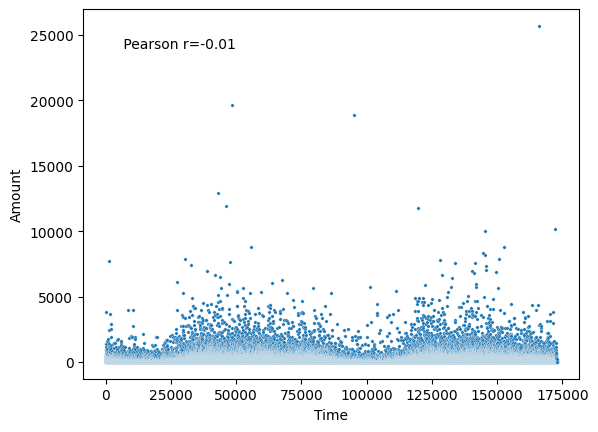

In [42]:
sns.scatterplot(x=df["Time"],
                y=df["Amount"],
                s=6)

r, _ = stats.pearsonr(df["Time"], df["Amount"])
plt.text(x=5_000, y=24_000, s=f" Pearson r={r:.2f}")


### Hipotese: As transações Fraudulentas Ocorreram num tempo mais distante da primeira transação

- **Motivo:**

Pois pode ser que as transações fraudulentas ocorreram num tempo mais distante da primeira transação, facilitando uma classificação futura pelo modelo de machine learning 

- **Gráfico(s) Escolhido(s):** 

Gráfico de boxplot

**Análise:**
> R: Foi identificado pelo gráfico do boxplot, que a hipotese não é verdade e que os gráficos indicam o contrário, pois pelo gráfico é possivel ver que tanto o 2° Quartil (referente a mediana), quanto o 3° Quartil para as transações que considerados fraudes, é menor em comparação ao 2° Quartil e ao 3° Quartil das transações que não são fraudes
> o que nos leva a concluir que 75% das transações fraudulentas estão num tempo mais perto da primeira transação, que os 75% das não fraudulentas, o que pode ajudar numa classificação futura do modelo de machine learning

<Axes: xlabel='Class', ylabel='Time'>

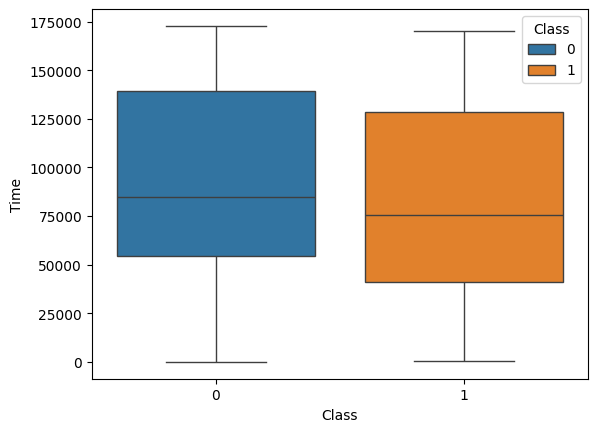

In [43]:
sns.boxplot(x=df["Class"], y=df["Time"], hue=df["Class"])

### Hipotese: As transações Fraudulentas tem um valor menor

- **Motivo:**

Pois pode ser que as transações fraudulentas possam ser de menor valor, pois uma transação fraudulenta com um menor valor é mais facil de passar impercepitivel, do que um valor grande pois um valor grande de transação pode chamar mais a atenção para a fraude

- **Gráfico(s) Escolhido(s):** 

Gráfico de boxplot, Gráfico de violino

**Análise:**
> R: 
>Foi identificado pelo gráfico do boxplot, que é possivel concluir que a hipotese é verdadeira para a base de dados, pois a existencia de outliers com valores acima é muito mais concentrada que nas transações que não são fraude do que para as transações que são fraude.

> O que poderia ajudar numa classificação futura do modelo, pois os valores muito acima dificilmente seriam fraudes.
> mesmo que Terceiro quartil seja maior, ha presença de valores muito grandes é mais frequente para a classe não fraudadora do que para a fraudadora

> [OBS] Porém pode ser que haja um vies nessa análise devido a quantidade desbalanceada de instancias das classes (fraude e não fraude) que consequentemente afeta análise, pois existe a possibilidade de se fossem coletados mais dados para a classe fraude, talvez esses valores e o proprio gráfico tivesse um comportamento diferente.

In [44]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


<Axes: xlabel='Class', ylabel='Amount'>

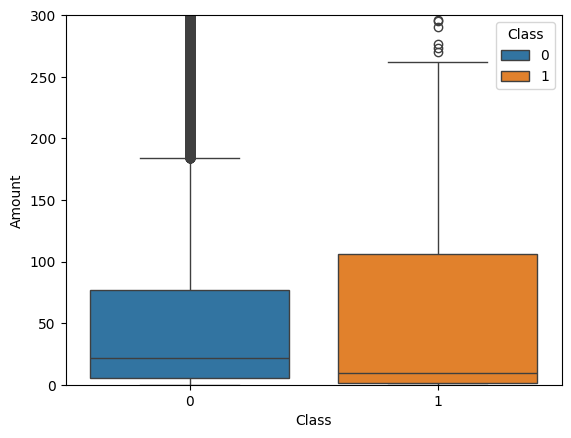

In [45]:
# Filtrando o Dataframe para ser possivel visualizar a caixa certinho
plt.ylim(0, 300)
sns.boxplot(x=df["Class"], y=df["Amount"], hue=df["Class"])

<Axes: xlabel='Class', ylabel='Amount'>

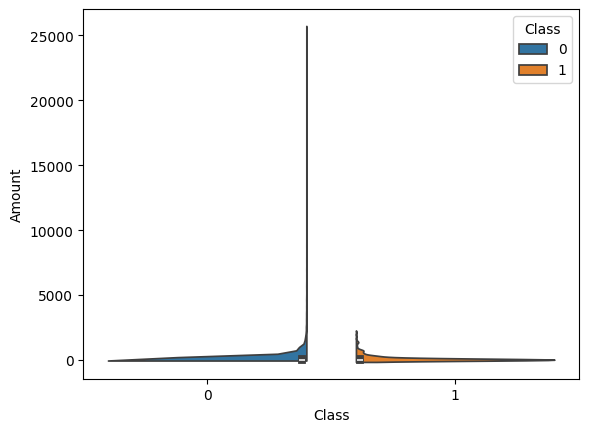

In [46]:
sns.violinplot(x=df["Class"], y=df["Amount"], hue=df["Class"], split=True)

In [47]:
def calcula_iqr(df, col):
    # Calculando quartis
    q1 = df[col].quantile(0.25)
    print(f"1° Quartil: {q1}")
    
    q2 = df[col].quantile(0.50)
    print(f"2° Quartil: {q2}")

    q3 = df[col].quantile(0.75)
    print(f"3° Quartil: {q3}")
    # Calculando o IQR
    iqr = q3 - q1
    print(f"IQR: {iqr}")


df_filtered = df[df["Amount"] < 5000]

df_filtered_fraud = df_filtered[df_filtered["Class"] == 1]


df_filtered_not_fraud = df_filtered[df_filtered["Class"] == 0]

print("Fraude")
calcula_iqr(df_filtered_fraud, "Amount")
print("Não Fraude")
calcula_iqr(df_filtered_not_fraud, "Amount")


Fraude
1° Quartil: 1.0
2° Quartil: 9.25
3° Quartil: 105.89
IQR: 104.89
Não Fraude
1° Quartil: 5.64
2° Quartil: 22.0
3° Quartil: 77.0
IQR: 71.36


### Hipotese: O intervalo de tempo mais frequente para as transações Fraudulentas é diferente do intervalo mais frequente para o transações Não Fraudulentas

- **Motivo:**

Analisar se a uma concentração maior das fraudes em um intervalo de tempo diferente das transações que não são fraudes, pois isso pode ser um fator que pode ajudar em uma classificação futura do modelo

- **Gráfico(s) Escolhido(s):** 
Mapa de Calor

**Análise:**
> R: Conforme evidenciado no gráfico, foi possivel visualizar que os intervalos mais frequentes realmente são diferentes, pois as transações que são fraudulentas são mais frequentes nos intevalos de 10h a 15h e 24h a 30h

> já as transações não fraudulentas são mais frequentes no intervalo de 36h a 42h e 42h a 48h

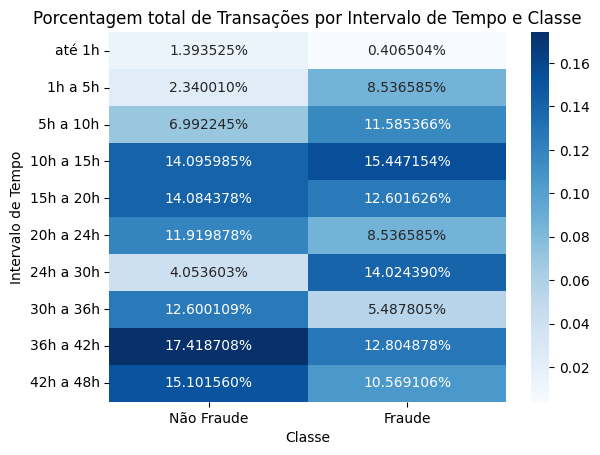

In [48]:
ctab = pd.crosstab(df["Time_Interval"], df["Class"], normalize="columns")
ctab.columns = ["Não Fraude", "Fraude"]
sns.heatmap(ctab,annot=True, fmt="%", cmap="Blues")
plt.xlabel("Classe")
plt.ylabel("Intervalo de Tempo")
plt.title("Porcentagem total de Transações por Intervalo de Tempo e Classe")
plt.show()

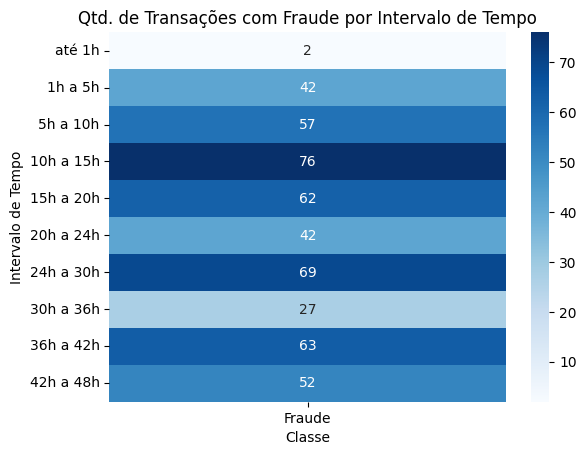

In [49]:
df_fraud = df[df["Class"] == 1]

ctab = pd.crosstab(df_fraud["Time_Interval"], df_fraud["Class"])
ctab.columns = ["Fraude"]
sns.heatmap(ctab,annot=True, fmt="d", cmap="Blues")
plt.xlabel("Classe")
plt.ylabel("Intervalo de Tempo")
plt.title("Qtd. de Transações com Fraude por Intervalo de Tempo")
plt.show()

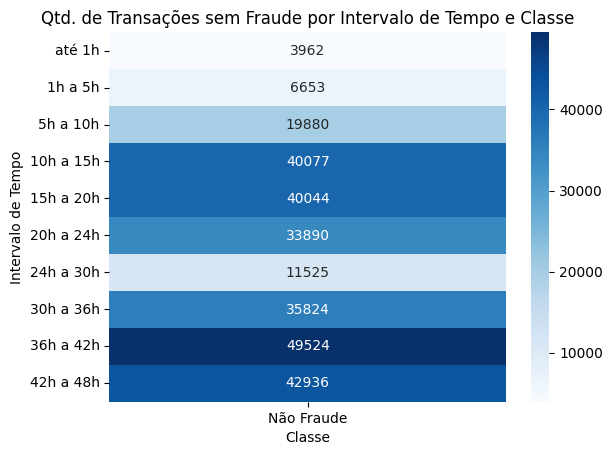

In [50]:
df_not_fraud = df[df["Class"] == 0]

ctab_not_fraud = pd.crosstab(df_not_fraud["Time_Interval"], df_not_fraud["Class"])
ctab_not_fraud.columns = ["Não Fraude"]

sns.heatmap(ctab_not_fraud, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Classe")
plt.ylabel("Intervalo de Tempo")
plt.title("Qtd. de Transações sem Fraude por Intervalo de Tempo e Classe")
plt.show()

### Hipotese: O intervalo de Valor mais frequente para as transações Fraudulentas é diferente do intervalo mais frequente para as transações Não Fraudulentas


- **Motivo:**

Analisar se existe alguma relação entre o intervalo dos valores das transações com as fraudes, pois isso pode ajudar numa futura classificação do modelo de machine learning

- **Gráfico(s) Escolhido(s):** 
Mapa de Calor

**Análise:**
> R: Conforme evidenciado no gráfico, foi possivel visualizar que não existe uma relação entre o intervalo e a classe, pois os valores mais frequentes para as duas classes são iguais, a unica diferença que tem e que no intervalo de 90 a 100 existe uma frequencia um pouco maior para a classe de Fraude, porém não é uma diferença significativa no geral

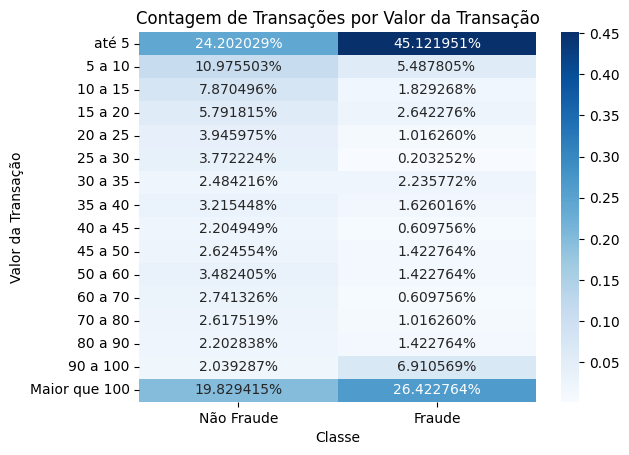

In [51]:
ctab = pd.crosstab(df["Amount_Interval"], df["Class"], normalize="columns")

# Renomeando as colunas para "Não Fraude" e "Fraude"
ctab.columns = ["Não Fraude", "Fraude"]

sns.heatmap(ctab, annot=True, fmt="%", cmap="Blues")
plt.xlabel("Classe")
plt.ylabel("Valor da Transação")
plt.title("Contagem de Transações por Valor da Transação")
plt.show()

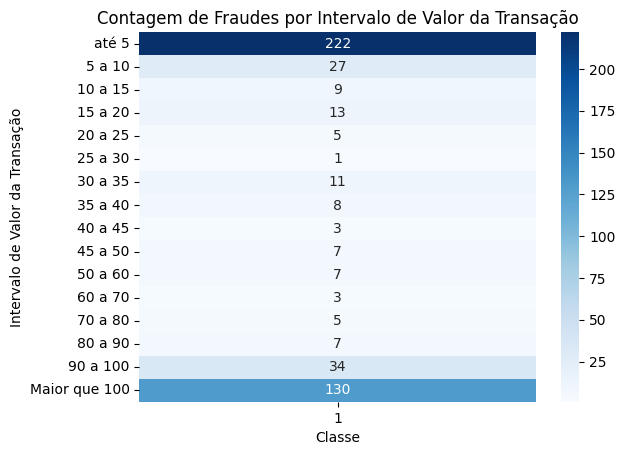

In [52]:
df_fraud = df[df["Class"] == 1]

ctab = pd.crosstab(df_fraud["Amount_Interval"], df_fraud["Class"])

sns.heatmap(ctab,annot=True, fmt="d", cmap="Blues")
plt.xlabel("Classe")
plt.ylabel("Intervalo de Valor da Transação")
plt.title("Contagem de Fraudes por Intervalo de Valor da Transação")
plt.show()

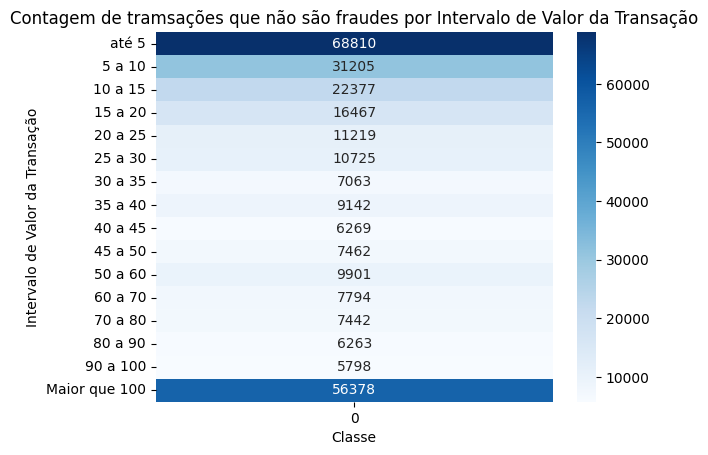

In [53]:
df_not_fraud = df[df["Class"] == 0]

ctab_not_fraud = pd.crosstab(df_not_fraud["Amount_Interval"], df_not_fraud["Class"])
sns.heatmap(ctab_not_fraud, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Classe")
plt.ylabel("Intervalo de Valor da Transação")
plt.title("Contagem de tramsações que não são fraudes por Intervalo de Valor da Transação")
plt.show()

### Hipotese: Existem concentração de transações entre o intervalos de valor das transações e de tempo


- **Motivo:**

Verificar dentro das duas variaveis de intervalos, existem intervalos mais frequentes que outros pois isso pode nos ajudar a entender o comportamento dos dados da base e como eles estão distribuidos

- **Gráfico(s) Escolhido(s):** 
Mapa de Calor

**Análise:**
> R: Conforme evidenciado no gráfico, foi possivel visualizar que existem intervalos mais frequentes como por exemplo no intervalo das transações até 5 euros, onde com os intervalos de 10h a 24h e 30h a 48h representam aproximadamente 20% das transações da base, confimando a existencia de uma concentração maior em alguns intervalos.

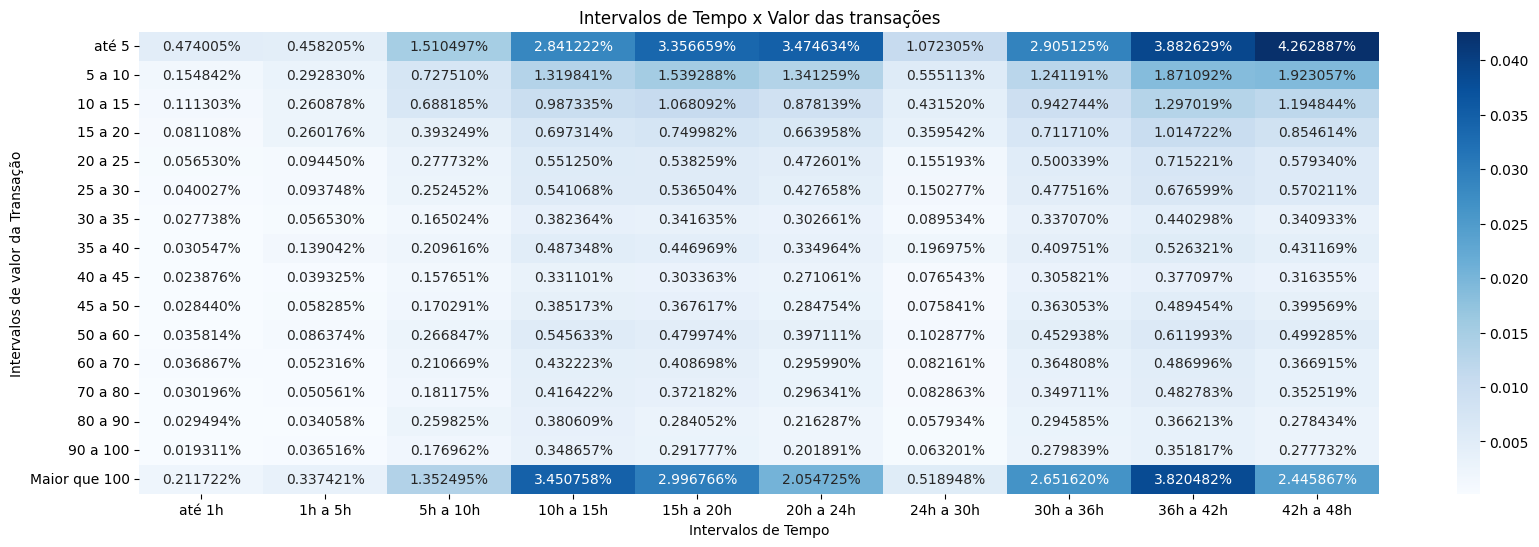

In [54]:
ctab = pd.crosstab(df["Amount_Interval"], df["Time_Interval"], normalize="all")
plt.figure(figsize=(20, 6))
sns.heatmap(ctab,annot=True, fmt="%", cmap="Blues")
plt.xlabel("Intervalos de Tempo")
plt.ylabel("Intervalos de valor da Transação")
plt.title("Intervalos de Tempo x Valor das transações")
plt.show()

# again, feel free to place as many cells to plot the visualizations,
# as well as describe to the main findings

# Final Plots (Effective Data Visualization)

In this section, you need to **enhance 3 multivariate visualizations** that were presented in the previous section of the report.
The goal is to enhance these visualizations so that they can be effectively presented to an audience unfamiliar with the dataset or with data analysis.
**Therefore, make sure that their size, colors, textures, and other visual elements are appropriate and convey the intended information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot;
2. Provide a description of the visualization, highlighting the key findings that can be drawn from it.


**Hint**: take a look at the checklist based on Evergreen’s work to ensure your visualizations meet the best practices for clarity and impact.

### Valor da Transação (Euros) ao longo do Tempo desde a primeira transação

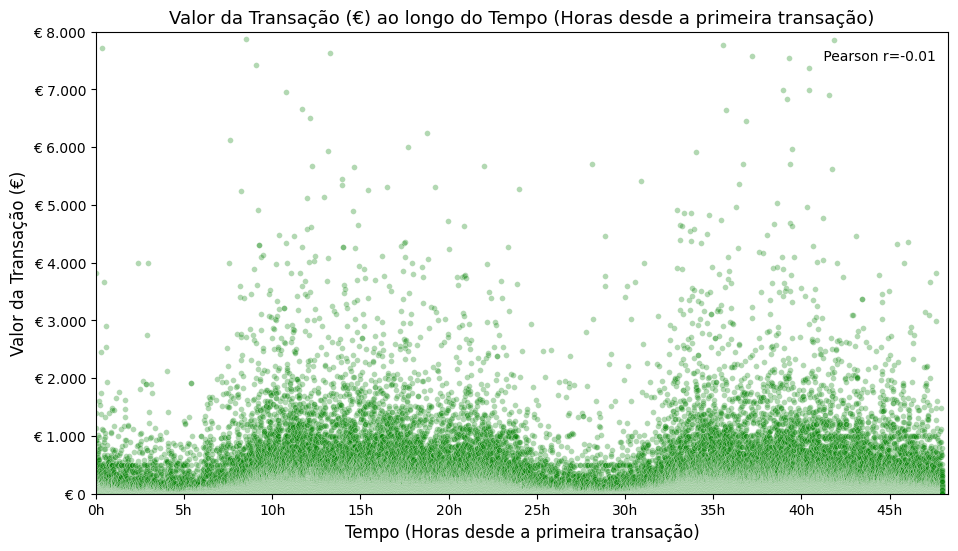

In [55]:
import matplotlib.ticker as ticker

plt.figure(figsize=(11, 6))
sns.scatterplot(
    x=df["Time"] / 3600,  # converter segundos para horas
    y=df["Amount"],
    s=17,
    color="green", 
    alpha=0.3
)
plt.title("Valor da Transação (€) ao longo do Tempo (Horas desde a primeira transação)", fontsize=13)
plt.xlabel("Tempo (Horas desde a primeira transação)", fontsize=12)
plt.ylabel("Valor da Transação (€)", fontsize=12)
plt.ylim(0, 8_000)
plt.xlim(0, 174_000 / 3600)

# Eixo X: formatar para mostrar 0, 5, 10, ... horas
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}h'))

# Eixo Y: adicionar símbolo do euro
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'€ {y:,.0f}'.replace(',', '.')))

plt.tick_params(axis='both', which='major', labelsize=10)


r, _ = stats.pearsonr(df["Time"], df["Amount"])

plt.text(x=41, y=7500, s=f" Pearson r={r:.2f}")

plt.show()

#### **Descrição**
Analisando o gráfico é possivel verificar que não existe uma relação entre o tempo em segundos de cada transação 
tambem é possivel verificar que existe uma maior concentração de transações com os valores abaixo de Mil Euros

### Tipo de Transação pelo Tempo em Segundos desde a primeira transação"

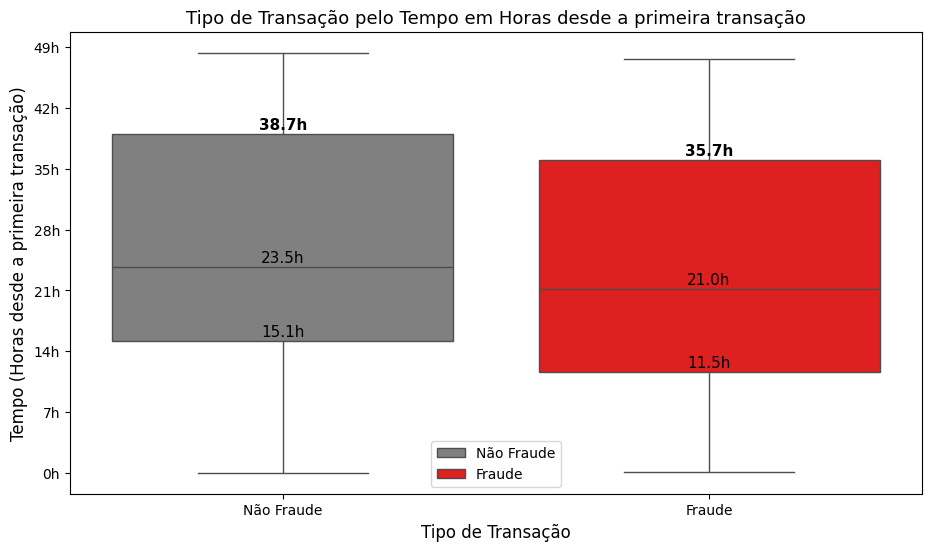

In [56]:
import matplotlib.ticker as ticker

plt.figure(figsize=(11, 6))
plt.title("Tipo de Transação pelo Tempo em Horas desde a primeira transação", fontsize=13)
plt.xlabel("Tipo de Transação", fontsize=12)
plt.ylabel("Tempo (Horas desde a primeira transação)", fontsize=12)
sns.boxplot(x=df["Class"], y=df["Time"], hue=df["Class"], palette=["gray", "red"])

# Alterar os valores do eixo X
plt.xticks(ticks=[0, 1], labels=["Não Fraude", "Fraude"])

# Alterar o título da legenda
plt.legend(title="Tipo de Transação", title_fontsize=12)
leg = plt.gca().legend()
leg.texts[0].set_text("Não Fraude")
leg.texts[1].set_text("Fraude")

# Função para converter segundos em horas e formatar
def format_horas(segundos):
    return f"{segundos/3600:.1f}h"

# Quartis para cada classe
quartis_nf = [
    df[df["Class"] == 0]["Time"].quantile(0.25),
    df[df["Class"] == 0]["Time"].median(),
    df[df["Class"] == 0]["Time"].quantile(0.75)
]
quartis_f = [
    df[df["Class"] == 1]["Time"].quantile(0.25),
    df[df["Class"] == 1]["Time"].median(),
    df[df["Class"] == 1]["Time"].quantile(0.75)
]

# Adiciona os valores dos quartis em horas acima das linhas correspondentes
for i, q in enumerate(quartis_nf):
    plt.text(
        x=0, y=q + 2000,
        s=format_horas(q),
        color="black",
        fontsize=11,
        ha="center",
        weight="bold" if i == 2 else "normal"
    )

for i, q in enumerate(quartis_f):
    plt.text(
        x=1, y=q + 2000,
        s=format_horas(q),
        color="black",
        fontsize=11,
        ha="center",
        weight="bold" if i == 2 else "normal"
    )

# Eixo Y em horas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/3600:.0f}h'))

plt.show()

#### **Descrição**

Analisando o gráfico é possivel verificar que 75% das transações fraudulentas ocorreram mais perto do tempo da primeira transação, que os 75% das não fraudulentas e esse comportamento tambem ocorre com os 50% e 25% das transações. 

Isso nos leva a Concluir que as transações fraudulentas estão mais concentradas perto da primeira transação, o que pode nos ajudar numa classificação futura.

In [57]:
# your code goes here

### Valor da transação por Tipo de Transação



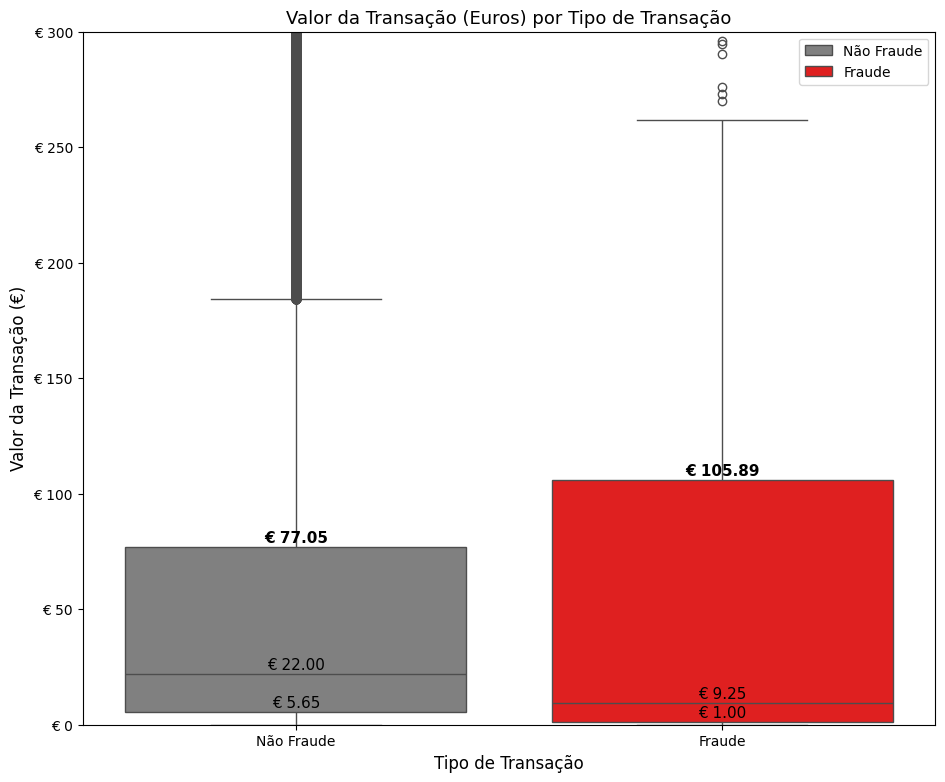

In [58]:
import matplotlib.ticker as ticker

plt.figure(figsize=(11, 9))
sns.boxplot(x=df["Class"], y=df["Amount"], hue=df["Class"], palette=["gray", "red"])
plt.title("Valor da Transação (Euros) por Tipo de Transação", fontsize=13)
plt.xlabel("Tipo de Transação", fontsize=12)
plt.ylabel("Valor da Transação (€)", fontsize=12)
plt.ylim(0, 300)

# Alterar os valores do eixo X
plt.xticks(ticks=[0, 1], labels=["Não Fraude", "Fraude"])

# Alterar o título da legenda
plt.legend(title="Tipo de Transação", title_fontsize=12)
leg = plt.gca().legend()
leg.texts[0].set_text("Não Fraude")
leg.texts[1].set_text("Fraude")

# Função para formatar valores em euros
def format_euro(valor):
    return f"€ {valor:,.2f}".replace(',', '.')

# Quartis para cada classe
quartis_nf = [
    df[df["Class"] == 0]["Amount"].quantile(0.25),
    df[df["Class"] == 0]["Amount"].median(),
    df[df["Class"] == 0]["Amount"].quantile(0.75)
]
quartis_f = [
    df[df["Class"] == 1]["Amount"].quantile(0.25),
    df[df["Class"] == 1]["Amount"].median(),
    df[df["Class"] == 1]["Amount"].quantile(0.75)
]

# Adiciona os valores dos quartis em euros acima das linhas correspondentes
for i, q in enumerate(quartis_nf):
    plt.text(
        x=0, y=q + 2,
        s=format_euro(q),
        color="black",
        fontsize=11,
        ha="center",
        weight="bold" if i == 2 else "normal"
    )

for i, q in enumerate(quartis_f):
    plt.text(
        x=1, y=q + 2,
        s=format_euro(q),
        color="black",
        fontsize=11,
        ha="center",
        weight="bold" if i == 2 else "normal"
    )

# Eixo Y com símbolo de euro
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'€ {y:,.0f}'.replace(',', '.')))

plt.show()


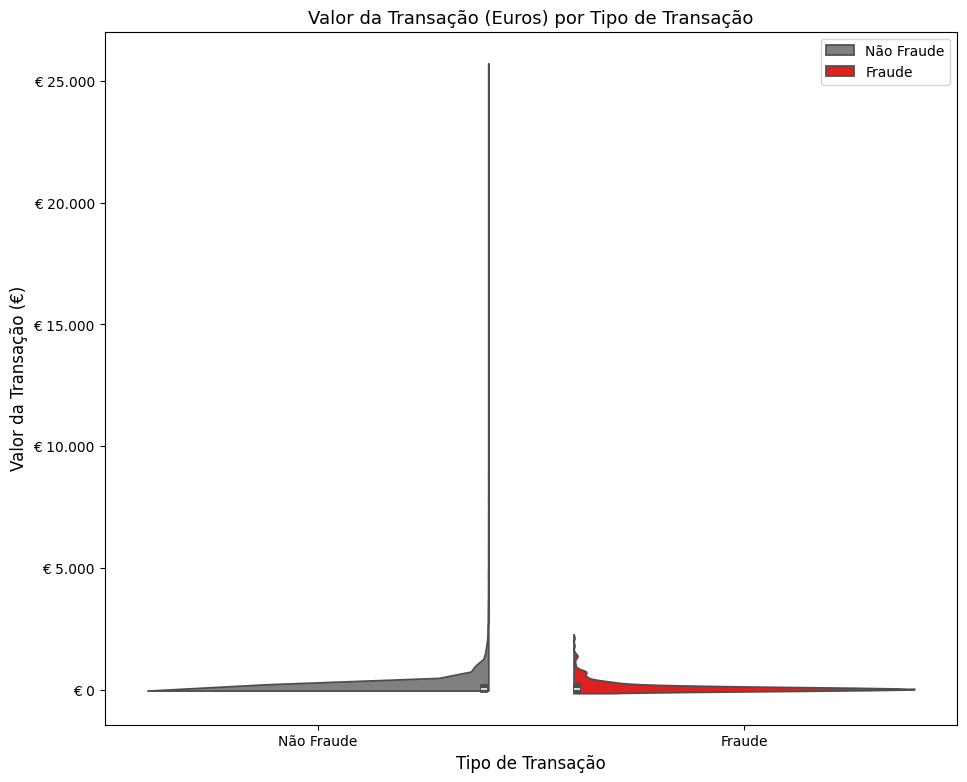

In [59]:
import matplotlib.ticker as ticker

plt.figure(figsize=(11, 9))
sns.violinplot(x=df["Class"], y=df["Amount"], hue=df["Class"], split=True, palette=["gray", "red"])
plt.title("Valor da Transação (Euros) por Tipo de Transação", fontsize=13)
plt.xlabel("Tipo de Transação", fontsize=12)
plt.ylabel("Valor da Transação (€)", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Não Fraude", "Fraude"])

# Função para formatar valores em euros
def format_euro(valor):
    return f"€ {valor:,.2f}".replace(',', '.')

# Eixo Y com símbolo de euro
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'€ {y:,.0f}'.replace(',', '.')))

plt.legend(title="Tipo de Transação", title_fontsize=12)
leg = plt.gca().legend()
leg.texts[0].set_text("Não Fraude")
leg.texts[1].set_text("Fraude")

plt.show()

#### **Descrição** 
Analisando o gráfico, é possível observar que as transações não fraudulentas possuem uma maior dispersão e maior frequencia de valores muito grandes, do que as transações de fraude

Entretanto, é importante ter cautela ao interpretar esse gráfico, pois o forte desbalanceamento entre as classes (quantidade maior de transações não fraudulentas do que fraudulentas) pode introduzir viés na análise visual. Com uma amostra maior da classe fraudulenta, os resultados poderiam apresentar um comportamento diferente.

# Digest

In this section you should write down the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2,500 characters (excluding spaces).

> Durante a realização da análise exploratória de dados, foi possível observar que nem sempre as hipóteses que formulamos inicialmente sobre o comportamento dos dados se confirmam. o que evidenciou ainda mais a importância dessa etapa como base para qualquer tipo de estudo envolvendo dados.

> Essa constatação nos levou a refletir sobre o papel essencial que a análise exploratória desempenha. Ela é indispensável tanto para análises explanatórias — que demandam um entendimento profundo sobre o significado e o comportamento de cada variável — quanto para etapas posteriores, como a análise preditiva com uso de algoritmos de machine learning.

> Pois sem uma compreensão clara dos dados com os quais estamos lidando, corremos o risco de gerar vieses significativos em nossas análises. No nosso exemplo, a classe de transações fraudulentas representa uma quantidade muito menor em relação à classe de transações não fraudulentas. 

> E que na utilização para avaliação pós treinamento do modelo de machine learning, você pode acabar avaliando mal o resultado do modelo, seja por utilizar uma metrica de avaliação de acertos geral (acuracia) de ao inves de utilizar uma métrica que leve em conta o desbalanceamento das classes (f1-score).

> Além disso, para que uma análise explanatória seja verdadeiramente significativa, é essencial compreender como os dados se comportam. Entre as principais descobertas feitas durante a análise, destacamos: o forte desbalanceamento da base de dados, a ausência de correlação relevante entre as variáveis PCA, e o fato de que a maioria desses campos apresenta uma distribuição leptocúrtica, com valores muito concentrados próximos de zero.

> Um dos principais desafios enfrentados foi a formulação de hipóteses plausíveis, uma vez que escolhemos uma base composta majoritariamente por variáveis PCA (componentes principais), cujo significado não é explicitamente conhecido. Isso dificultou a obtenção de insights mais profundos e limitou nossas análises às poucas variáveis compreensíveis: Amount (valor da transação), Time (tempo desde a primeira transação) e Class (indicador de fraude) e as variaveis derivadas delas (Amount Interval e Time Interval).

> Pois em nosso caso, essa base em especifico foi muito utilizada para treinamento de machine learning e analises preditivas com o foco em classificação, porém ela não foi uma base pensada para se fazer uma analise exploratória.

> O que dificultou bastante, tanto nas analises univariadas das variaveis, pois a maioria era PCA, quanto na analise Multivariada e plotagem final, em que a maior parte das analises teve que focar nas 3 variaveis que não eram PCA e nas 2 que criamos.

> O que Dificulta tambem em uma analise explanatória, pois se alguem fizesse alguma pergunta sobre o PCA ou se nos apresentassamos alguma analise sobre o PCA, não saberiamos nem responder, nem explicar o porque aquilo acontece.

> Portanto, em projetos futuros, é fundamental realizar uma escolha mais criteriosa da base de dados, priorizando aquelas que possibilitem uma análise exploratória mais completa e rica. Afinal, uma boa análise exploratória é a base para análises explanatórias e preditivas mais robustas, informativas e de maior valor técnico.




# Machine Learning (**post checkpoint!**)

In this section, you must create at least **3 machine learning models** for the task at hand. Depending on the problem's nature, you must select from classification, regression, or clustering models.
It is also important that you:
* Select **an appropriate validation protocol**, providing a rationale for why it is appropriate for this specific task;
* Choose **a suitable set of evaluation metrics**, providing an explanation for each and describing how it contributes to evaluating the model's performance in the context of this specific task.

#### Explicações:

 - Dada a natureza altamente desbalanceada do dataset (transações fraudulentas versus não fraudulentas), o F1-Score foi selecionado como a métrica principal de avaliação. Esta escolha é justificada por sua capacidade de ponderar a precisão (proporção de verdadeiros positivos entre todas as classificações positivas) e o recall (proporção de verdadeiros positivos entre todos os positivos reais). Diferentemente da acurácia simples, o F1-Score é menos sensível ao domínio da classe majoritária. Além disso, a dificuldade em determinar se falsos positivos (transações legítimas classificadas como fraude) ou falsos negativos (fraudes não detectadas) possuem um impacto mais severo na aplicação real, levou à escolha do F1-Score, que busca um equilíbrio entre essas duas preocupações.

 -  Hold-out: Uma porção do dataset foi separada para validação, garantindo que o modelo fosse avaliado em dados não vistos durante o treinamento.

 - Validação Cruzada Estratificada com 10 Dobras: Para obter uma estimativa mais robusta do desempenho do modelo e mitigar a variância associada à divisão única do hold-out, foi aplicada a validação cruzada com 10 dobras (k-fold cross-validation). A natureza estratificada dessa validação é crucial em datasets desbalanceados, pois assegura que a proporção de classes (fraudulentas e não fraudulentas) seja mantida em cada dobra, evitando cenários onde dobras possam conter poucas ou nenhuma instância da classe minoritária.

- Outro fator que nos guiou para a escolha do classificador foi o tempo necessário para treinamento e predição

### Pre-Processamento

In [60]:
pipeline = Pipeline(steps=[
    ("OrdinalEncoder", ColumnTransformer(
            transformers=[
                ("Amount_Interval", OrdinalEncoder(), ["Amount_Interval"]),
                ("Time_Interval", OrdinalEncoder(), ["Time_Interval"])
            ], remainder='passthrough'
        ).set_output(transform='pandas')
    ),
    ("Normalizer", ColumnTransformer(
        transformers=[
                ("Normalize", PowerTransformer(method='yeo-johnson').set_output(transform="pandas"), ["remainder__Amount"])
            ], remainder='passthrough'
        ).set_output(transform='pandas') 
    ),
    ("Scaler", MinMaxScaler(feature_range=(0, 1)).set_output(transform='pandas'))
])

df_scaled = pipeline.fit_transform(df.drop(columns=["Class"]))

df_scaled["Class"] = df["Class"].reset_index(drop=True)
df_scaled.head(10)

,Normalize__remainder__Amount,remainder__Amount_Interval__Amount_Interval,remainder__Time_Interval__Time_Interval,remainder__remainder__Time,remainder__remainder__V1,remainder__remainder__V2,remainder__remainder__V3,remainder__remainder__V4,remainder__remainder__V5,remainder__remainder__V6,...,remainder__remainder__V20,remainder__remainder__V21,remainder__remainder__V22,remainder__remainder__V23,remainder__remainder__V24,remainder__remainder__V25,remainder__remainder__V26,remainder__remainder__V27,remainder__remainder__V28,Class
0,0.550690,0.933333,1.0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0
1,0.155526,1.000000,1.0,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0
2,0.639354,0.933333,1.0,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0
3,0.531963,0.933333,1.0,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0
4,0.475782,0.666667,1.0,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0
5,0.182624,1.000000,1.0,0.000012,0.951057,0.777393,0.857187,0.244472,0.768550,0.262721,...,0.581170,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0
6,0.210954,1.000000,1.0,0.000023,0.979184,0.768746,0.838200,0.305241,0.767008,0.265762,...,0.577927,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0
7,0.421500,0.400000,1.0,0.000041,0.947348,0.782220,0.856031,0.230111,0.772104,0.267324,...,0.578596,0.592809,0.462660,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0
8,0.504249,0.866667,1.0,0.000041,0.943101,0.770278,0.835452,0.239894,0.783688,0.300439,...,0.580827,0.560296,0.497525,0.662401,0.518546,0.598855,0.362697,0.416728,0.316014,0
9,0.182869,1.000000,1.0,0.000052,0.952547,0.779072,0.855511,0.242081,0.769078,0.260539,...,0.582434,0.557499,0.480466,0.663640,0.330349,0.573992,0.440836,0.421056,0.314810,0


<Axes: xlabel='Amount', ylabel='Count'>

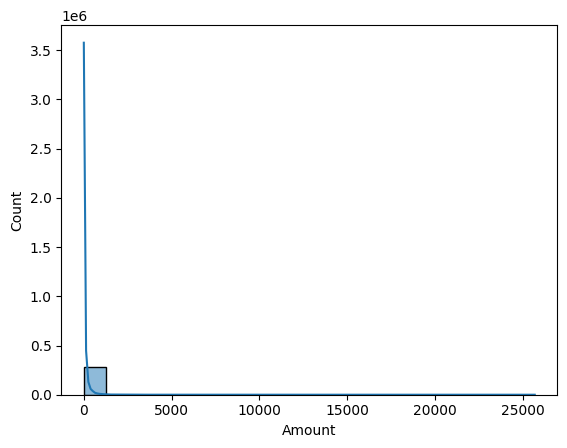

In [61]:
sns.histplot(df["Amount"], bins=20, kde=True)

<Axes: xlabel='Normalize__remainder__Amount', ylabel='Count'>

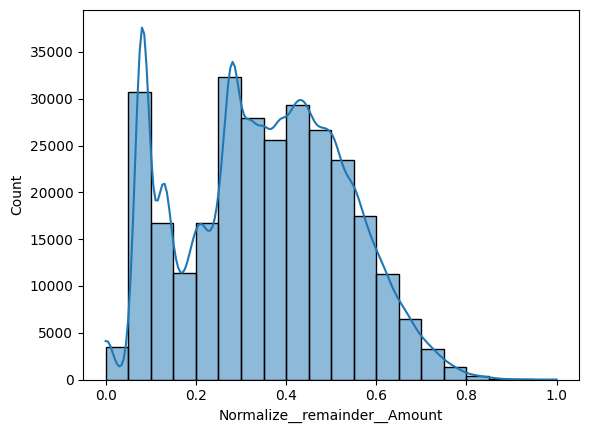

In [62]:
sns.histplot(df_scaled["Normalize__remainder__Amount"], bins=20, kde=True)

### Seleção de Colunas - Features

<Axes: >

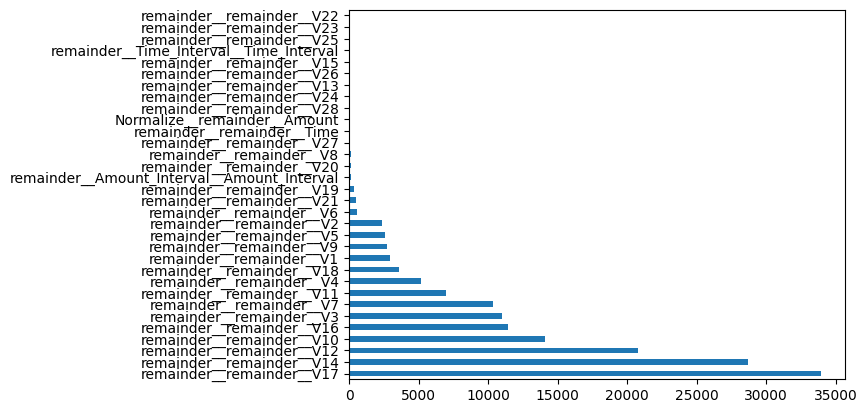

In [63]:
from sklearn.feature_selection import SelectKBest

# Dividir a base em X,y
X, y = df_scaled.drop("Class", axis=1), df_scaled["Class"]

# Instanciar o
skb = SelectKBest(k="all")

# Aplicar a transformação
skb.fit(X, y)

ranking = pd.Series(index=X.columns, data=skb.scores_)
ranking.sort_values(ascending=False).plot(kind="barh")

In [64]:
df_scaled.columns

Index(['Normalize__remainder__Amount',
       'remainder__Amount_Interval__Amount_Interval',
       'remainder__Time_Interval__Time_Interval', 'remainder__remainder__Time',
       'remainder__remainder__V1', 'remainder__remainder__V2',
       'remainder__remainder__V3', 'remainder__remainder__V4',
       'remainder__remainder__V5', 'remainder__remainder__V6',
       'remainder__remainder__V7', 'remainder__remainder__V8',
       'remainder__remainder__V9', 'remainder__remainder__V10',
       'remainder__remainder__V11', 'remainder__remainder__V12',
       'remainder__remainder__V13', 'remainder__remainder__V14',
       'remainder__remainder__V15', 'remainder__remainder__V16',
       'remainder__remainder__V17', 'remainder__remainder__V18',
       'remainder__remainder__V19', 'remainder__remainder__V20',
       'remainder__remainder__V21', 'remainder__remainder__V22',
       'remainder__remainder__V23', 'remainder__remainder__V24',
       'remainder__remainder__V25', 'remainder__remainde

In [65]:
df_scaled.drop(
    columns=[
        "Normalize__remainder__Amount",
        "remainder__remainder__V22",
        "remainder__remainder__V23",
        "remainder__remainder__V24",
        "remainder__remainder__V25",
        "remainder__remainder__V26",
        "remainder__remainder__V28",
        "remainder__remainder__Time",
        "remainder__remainder__V15",
        "remainder__remainder__V13",
        "remainder__remainder__V27",
        "remainder__remainder__V8",
        "remainder__remainder__V20",
        'remainder__Amount_Interval__Amount_Interval',
       'remainder__Time_Interval__Time_Interval'
    ],
    axis=1,
    inplace=True
)

### Treinamento com Hold Out

#### Arvore de Decisão

(199364, 17)
(199364,)
(85443, 17)
(85443,)
Precision score: 81.63265306122449
Recall score: 81.08108108108108
F1 score: 81.35593220338984


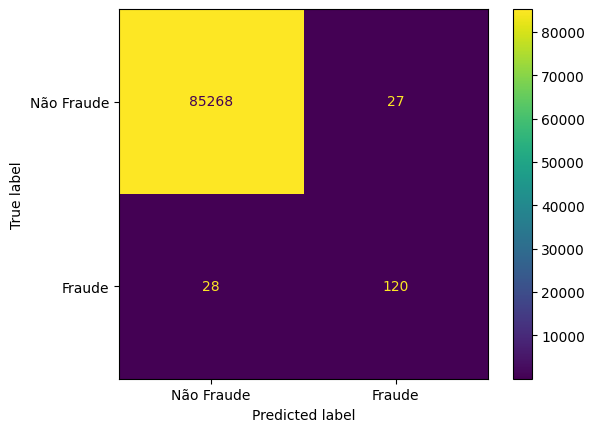

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=["Class"])  # Features
y = df_scaled["Class"]  # Target variable

# Experimental Protocol Holdout (70/30)
XTrain, XTest, yTrain, ytest = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y) # stratify = Conjunto de rotulos | Random_state=Semente de aleatoriedade

print(XTrain.shape)
print(yTrain.shape)
print(XTest.shape)
print(ytest.shape)

# Model declaration
clf=DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=5,          
    random_state=42       
)

# Model training
clf.fit(XTrain,yTrain)

# Test prediction
ypred=clf.predict(XTest) # Qual o (Y = Rotulo) previsto pelo modelo

# Ploting the confusion matrix
cm= confusion_matrix(ytest, ypred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Fraude", "Fraude"])
disp.plot()

# Precision | Falso Positivo
print("Precision score:", precision_score(ytest, ypred, average="binary") * 100)

# Recall | Falso Negativo
print("Recall score:", recall_score(ytest, ypred, average="binary") * 100)

# F1 Score
print("F1 score:", f1_score(ytest, ypred, average="binary") * 100)

#### Nayve Bayes

Precision score: 8.683274021352313
Recall score: 82.43243243243244
F1 score: 15.71152607855763


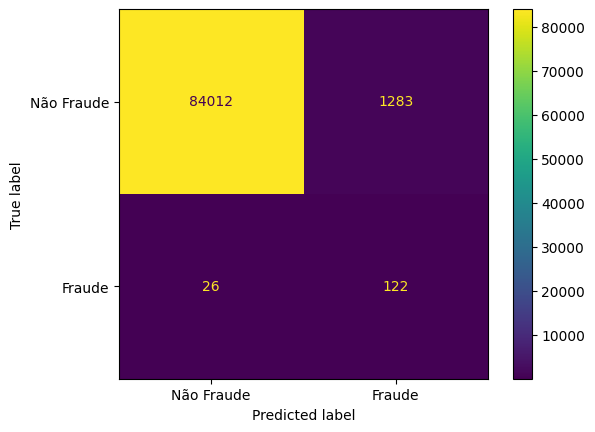

In [67]:
from sklearn.naive_bayes import GaussianNB

# Separar features e target
X = df_scaled.drop(columns=["Class"])
y = df_scaled["Class"]

# Holdout (70/30) com estratificação
XTrain, XTest, yTrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Instanciar e treinar o modelo GaussianNB
gnb = GaussianNB()
gnb.fit(XTrain, yTrain)

# Previsão no conjunto de teste
ypred = gnb.predict(XTest)

# Matriz de confusão
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Fraude", "Fraude"])
disp.plot()

# Métricas
print("Precision score:", precision_score(ytest, ypred, average="binary") * 100)
print("Recall score:", recall_score(ytest, ypred, average="binary") * 100)
print("F1 score:", f1_score(ytest, ypred, average="binary") * 100)

#### Knn

Precision score: 83.33333333333334
Recall score: 77.7027027027027
F1 score: 80.41958041958041


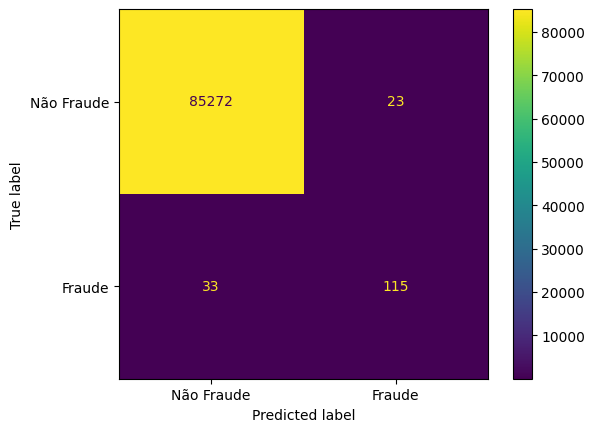

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Separar features e target
# X, y, XTrain, XTest, yTrain, ytest já estão definidos

# Instanciar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(XTrain, yTrain)

# Previsão no conjunto de teste
ypred_knn = knn.predict(XTest)

# Matriz de confusão
cm_knn = confusion_matrix(ytest, ypred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Não Fraude", "Fraude"])
disp_knn.plot()

# Métricas
print("Precision score:", precision_score(ytest, ypred_knn, average="binary") * 100)
print("Recall score:", recall_score(ytest, ypred_knn, average="binary") * 100)
print("F1 score:", f1_score(ytest, ypred_knn, average="binary") * 100)

### 10 Dobras Validação cruzada estratificada

#### Arvore de decisão

Precision médio: 89.56%
Recall médio: 77.84%
F1-score médio: 83.21%


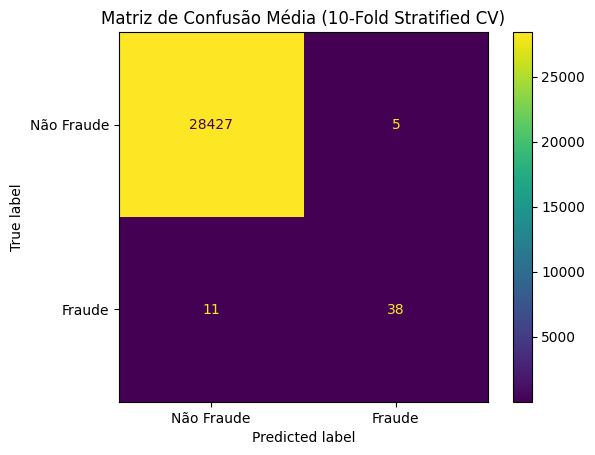

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

import matplotlib.pyplot as plt

X = df_scaled.drop(columns=["Class"])
y = df_scaled["Class"]

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

precisions = []
recalls = []
f1s = []
cms = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precisions.append(precision_score(y_test, y_pred, average="binary"))
    recalls.append(recall_score(y_test, y_pred, average="binary"))
    f1s.append(f1_score(y_test, y_pred, average="binary"))
    cms.append(confusion_matrix(y_test, y_pred))

# Média das métricas
print(f"Precision médio: {np.mean(precisions)*100:.2f}%")
print(f"Recall médio: {np.mean(recalls)*100:.2f}%")
print(f"F1-score médio: {np.mean(f1s)*100:.2f}%")

# Plotar a matriz de confusão média
cm_mean = np.mean(cms, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=["Não Fraude", "Fraude"])
disp.plot(values_format=".0f")
plt.title("Matriz de Confusão Média (10-Fold Stratified CV)")
plt.show()

#### Nayve Bayes

Precision médio: 8.87%
Recall médio: 85.16%
F1-score médio: 16.07%


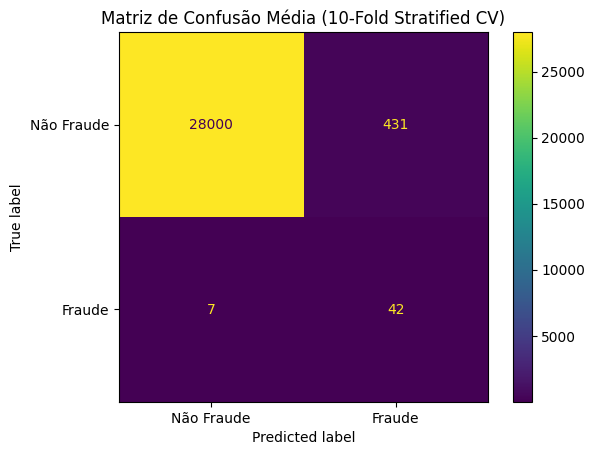

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

import matplotlib.pyplot as plt

X = df_scaled.drop(columns=["Class"])
y = df_scaled["Class"]

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

precisions = []
recalls = []
f1s = []
cms = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precisions.append(precision_score(y_test, y_pred, average="binary"))
    recalls.append(recall_score(y_test, y_pred, average="binary"))
    f1s.append(f1_score(y_test, y_pred, average="binary"))
    cms.append(confusion_matrix(y_test, y_pred))

# Média das métricas
print(f"Precision médio: {np.mean(precisions)*100:.2f}%")
print(f"Recall médio: {np.mean(recalls)*100:.2f}%")
print(f"F1-score médio: {np.mean(f1s)*100:.2f}%")

# Plotar a matriz de confusão média
cm_mean = np.mean(cms, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=["Não Fraude", "Fraude"])
disp.plot(values_format=".0f")
plt.title("Matriz de Confusão Média (10-Fold Stratified CV)")
plt.show()

#### Knn

Precision médio: 87.05%
Recall médio: 78.24%
F1-score médio: 82.35%


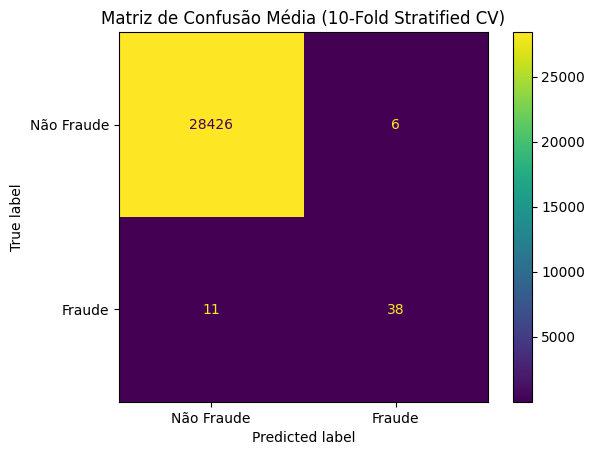

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

import matplotlib.pyplot as plt

X = df_scaled.drop(columns=["Class"])
y = df_scaled["Class"]

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

precisions = []
recalls = []
f1s = []
cms = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precisions.append(precision_score(y_test, y_pred, average="binary"))
    recalls.append(recall_score(y_test, y_pred, average="binary"))
    f1s.append(f1_score(y_test, y_pred, average="binary"))
    cms.append(confusion_matrix(y_test, y_pred))

# Média das métricas
print(f"Precision médio: {np.mean(precisions)*100:.2f}%")
print(f"Recall médio: {np.mean(recalls)*100:.2f}%")
print(f"F1-score médio: {np.mean(f1s)*100:.2f}%")

# Plotar a matriz de confusão média
cm_mean = np.mean(cms, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=["Não Fraude", "Fraude"])
disp.plot(values_format=".0f")
plt.title("Matriz de Confusão Média (10-Fold Stratified CV)")
plt.show()

### Treinamento com Matriz de Confusão

1. Save this report as a Jupyter Notebook (`.ipynb`);
2. Export a copy of the report as a PDF file (`.pdf`);
3. Copy the dataset;
4. Compress all the files (the Jupyter Notebook, PDF, and dataset) into a single ZIP archive (`<your_team_name>.zip`);
5. Upload the ZIP file to AVA.